### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

### Imoprting CSV file.

In [2]:
# Importing CSV file.
csv_file_path = 'Hourly data.csv'
df = pd.read_csv(csv_file_path)

### Display Dataframe

In [3]:
print(df)

                  City       Date  SO2-H01 SO2-H02 SO2-H03 SO2-H04 SO2-H05  \
0      Ottawa Downtown  2022-01-01     0.6     0.5     0.5     0.4     0.5   
1      Ottawa Downtown  2022-01-02     0.3     0.3     0.3     0.3     0.3   
2      Ottawa Downtown  2022-01-03     0.3     0.4     0.4     0.3     0.3   
3      Ottawa Downtown  2022-01-04     0.4     0.5     0.4     0.4     0.4   
4      Ottawa Downtown  2022-01-05     0.4     0.4     0.4     0.4     0.4   
...                ...         ...     ...     ...     ...     ...     ...   
2185  Windsor Downtown  2022-12-27     0.8     0.8     0.7     0.7     1.1   
2186  Windsor Downtown  2022-12-28     0.1     0.2     0.2     0.3     0.2   
2187  Windsor Downtown  2022-12-29     0.5     0.5     0.5     0.5     0.4   
2188  Windsor Downtown  2022-12-30     0.2     0.3     0.3     0.2     0.2   
2189  Windsor Downtown  2022-12-31     NaN     NaN     NaN     NaN     NaN   

     SO2-H06 SO2-H07 SO2-H08  ... NOx-H15 NOx-H16 NOx-H17 NOx-H

In [4]:
df.head()

City       Date  SO2-H01 SO2-H02 SO2-H03 SO2-H04 SO2-H05  \
0  Ottawa Downtown  2022-01-01     0.6     0.5     0.5     0.4     0.5   
1  Ottawa Downtown  2022-01-02     0.3     0.3     0.3     0.3     0.3   
2  Ottawa Downtown  2022-01-03     0.3     0.4     0.4     0.3     0.3   
3  Ottawa Downtown  2022-01-04     0.4     0.5     0.4     0.4     0.4   
4  Ottawa Downtown  2022-01-05     0.4     0.4     0.4     0.4     0.4   

  SO2-H06 SO2-H07 SO2-H08  ... NOx-H15 NOx-H16 NOx-H17 NOx-H18 NOx-H19  \
0     0.5     0.4     0.4  ...     7.9     8.4     5.7     6.2       6   
1     0.3     0.3     0.3  ...     3.5       4       4     3.8     3.6   
2     0.3     0.3     0.3  ...     9.6     7.3    1 .8    13.3    17.9   
3     0.6     0.5     0.5  ...    15.9    21.2    31.5    35.1    43.3   
4     0.4     0.5     0.4  ...    18.8    18.5    21.6    27.8    31.9   

  NOx-H20 NOx-H21 NOx-H22 NOx-H23 NOx-H24  
0     5.9     4.9     3.7     4.4     3.5  
1     3.6     3.1     3.8     3.8     3.2  
2    21.1    5 .5    71.9    3 .1    24.8  
3    31.7    21.4    2 .2    24.2    27.2  
4      12    12.3    12.4     8.4     9.1  

[5 rows x 170 columns]

### To count null value(NaN or None).

In [5]:
df.isnull().sum()

City         0
Date         0
SO2-H01    705
SO2-H02    635
SO2-H03    688
          ... 
NOx-H20      2
NOx-H21      4
NOx-H22      5
NOx-H23      3
NOx-H24      2
Length: 170, dtype: int64

In [6]:
df.info

<bound method DataFrame.info of                   City       Date  SO2-H01 SO2-H02 SO2-H03 SO2-H04 SO2-H05  \
0      Ottawa Downtown  2022-01-01     0.6     0.5     0.5     0.4     0.5   
1      Ottawa Downtown  2022-01-02     0.3     0.3     0.3     0.3     0.3   
2      Ottawa Downtown  2022-01-03     0.3     0.4     0.4     0.3     0.3   
3      Ottawa Downtown  2022-01-04     0.4     0.5     0.4     0.4     0.4   
4      Ottawa Downtown  2022-01-05     0.4     0.4     0.4     0.4     0.4   
...                ...         ...     ...     ...     ...     ...     ...   
2185  Windsor Downtown  2022-12-27     0.8     0.8     0.7     0.7     1.1   
2186  Windsor Downtown  2022-12-28     0.1     0.2     0.2     0.3     0.2   
2187  Windsor Downtown  2022-12-29     0.5     0.5     0.5     0.5     0.4   
2188  Windsor Downtown  2022-12-30     0.2     0.3     0.3     0.2     0.2   
2189  Windsor Downtown  2022-12-31     NaN     NaN     NaN     NaN     NaN   

     SO2-H06 SO2-H07 SO2-H08  .

In [7]:
df.describe()

City       Date  SO2-H01 SO2-H02 SO2-H03 SO2-H04 SO2-H05  \
count              2190        2190    1485    1555    1502    1482    1518   
unique                6         365      68      61      62      66      59   
top     Ottawa Downtown  2022-01-01                                           
freq                365           6     578     515     564     599     558   

       SO2-H06 SO2-H07 SO2-H08  ... NOx-H15 NOx-H16 NOx-H17 NOx-H18 NOx-H19  \
count     1516    1531    1576  ...    2177    2172    2178    2185    2187   
unique      68      66      71  ...     305     299     306     315     314   
top                             ...       4       4       4       4       4   
freq       564     523     477  ...      50      57      49      47      58   

       NOx-H20 NOx-H21 NOx-H22 NOx-H23 NOx-H24  
count     2188    2186    2185    2187    2188  
unique     353     357     375     386     385  
top          5       4       5       4       4  
freq        41      39      44      41      48  

[4 rows x 170 columns]

In [8]:
100 - (len(df.dropna())/len(df))*100

46.80365296803652

In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)

### Replacing Null values with spaces

In [10]:
df = pd.read_csv("Hourly data.csv", na_values=' ')
df

City       Date   SO2-H01 SO2-H02  SO2-H03  SO2-H04  \
0      Ottawa Downtown  2022-01-01      0.6     0.5      0.5      0.4   
1      Ottawa Downtown  2022-01-02      0.3     0.3      0.3      0.3   
2      Ottawa Downtown  2022-01-03      0.3     0.4      0.4      0.3   
3      Ottawa Downtown  2022-01-04      0.4     0.5      0.4      0.4   
4      Ottawa Downtown  2022-01-05      0.4     0.4      0.4      0.4   
...                ...         ...      ...     ...      ...      ...   
2185  Windsor Downtown  2022-12-27      0.8     0.8      0.7      0.7   
2186  Windsor Downtown  2022-12-28      0.1     0.2      0.2      0.3   
2187  Windsor Downtown  2022-12-29      0.5     0.5      0.5      0.5   
2188  Windsor Downtown  2022-12-30      0.2     0.3      0.3      0.2   
2189  Windsor Downtown  2022-12-31      NaN     NaN      NaN      NaN   

      SO2-H05  SO2-H06 SO2-H07  SO2-H08  ... NOx-H15  NOx-H16 NOx-H17  \
0         0.5      0.5     0.4      0.4  ...     7.9      8.4     5.7   
1         0.3      0.3     0.3      0.3  ...     3.5        4       4   
2         0.3      0.3     0.3      0.3  ...     9.6      7.3    1 .8   
3         0.4      0.6     0.5      0.5  ...    15.9     21.2    31.5   
4         0.4      0.4     0.5      0.4  ...    18.8     18.5    21.6   
...       ...      ...     ...      ...  ...     ...      ...     ...   
2185      1.1      0.6     0.7      0.6  ...     8.6      9.5     1.3   
2186      0.2      0.2     0.1      0.1  ...      11      1.8    14.2   
2187      0.4      0.3     0.2      0.2  ...    14.2     12.9    12.2   
2188      0.2      0.2     0.2      0.2  ...    11.6      9.5     9.4   
2189      NaN      NaN     NaN      0.1  ...     1.8        1     1.8   

      NOx-H18 NOx-H19 NOx-H20 NOx-H21 NOx-H22 NOx-H23  NOx-H24  
0         6.2       6     5.9     4.9     3.7     4.4      3.5  
1         3.8     3.6     3.6     3.1     3.8     3.8      3.2  
2        13.3    17.9    21.1    5 .5    71.9    3 .1     24.8  
3        35.1    43.3    31.7    21.4    2 .2    24.2     27.2  
4        27.8    31.9      12    12.3    12.4     8.4      9.1  
...       ...     ...     ...     ...     ...     ...      ...  
2185      1.3     1.5       8     8.5     9.2     1.4      8.5  
2186     15.1     9.4     9.4     9.3     1.2     8.1      7.7  
2187       12    11.9     9.5       9     9.4     8.1      6.8  
2188      1.8    15.5      13     9.9    13.5     2.3       17  
2189     11.6    11.4     9.8    11.5     9.8     9.7      9.5  

[2190 rows x 170 columns]

### To check different columns in the Dataframe.

In [11]:
col = df.columns
print("The different columns are: \n",col)

The different columns are: 
 Index(['City', 'Date ', 'SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05',
       'SO2-H06', 'SO2-H07', 'SO2-H08',
       ...
       'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20',
       'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24'],
      dtype='object', length=170)


### To check the datatypes of the different columns in the Dataframe.

In [12]:
# To find out different datatypes in the dataset. 
d_types = df.dtypes
print("The different Data Types are:\n",d_types)

The different Data Types are:
 City        object
Date        object
SO2-H01    float64
SO2-H02     object
SO2-H03    float64
            ...   
NOx-H20     object
NOx-H21     object
NOx-H22     object
NOx-H23     object
NOx-H24     object
Length: 170, dtype: object


### To replace Non- Numeric values with NaN in the Dataframe.

In [13]:
convert = [
    'SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24',
    'CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24',
    'NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24',
    'NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24',
    'O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24',
    'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24',
    'NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24'
]

# Iterate through the columns and convert all non float values to float.
for column in convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Save the updated DataFrame. 
df.to_csv('updated_file.csv', index=False)
df

City       Date   SO2-H01  SO2-H02  SO2-H03  SO2-H04  \
0      Ottawa Downtown  2022-01-01      0.6      0.5      0.5      0.4   
1      Ottawa Downtown  2022-01-02      0.3      0.3      0.3      0.3   
2      Ottawa Downtown  2022-01-03      0.3      0.4      0.4      0.3   
3      Ottawa Downtown  2022-01-04      0.4      0.5      0.4      0.4   
4      Ottawa Downtown  2022-01-05      0.4      0.4      0.4      0.4   
...                ...         ...      ...      ...      ...      ...   
2185  Windsor Downtown  2022-12-27      0.8      0.8      0.7      0.7   
2186  Windsor Downtown  2022-12-28      0.1      0.2      0.2      0.3   
2187  Windsor Downtown  2022-12-29      0.5      0.5      0.5      0.5   
2188  Windsor Downtown  2022-12-30      0.2      0.3      0.3      0.2   
2189  Windsor Downtown  2022-12-31      NaN      NaN      NaN      NaN   

      SO2-H05  SO2-H06  SO2-H07  SO2-H08  ...  NOx-H15  NOx-H16  NOx-H17  \
0         0.5      0.5      0.4      0.4  ...      7.9      8.4      5.7   
1         0.3      0.3      0.3      0.3  ...      3.5      4.0      4.0   
2         0.3      0.3      0.3      0.3  ...      9.6      7.3      NaN   
3         0.4      0.6      0.5      0.5  ...     15.9     21.2     31.5   
4         0.4      0.4      0.5      0.4  ...     18.8     18.5     21.6   
...       ...      ...      ...      ...  ...      ...      ...      ...   
2185      1.1      0.6      0.7      0.6  ...      8.6      9.5      1.3   
2186      0.2      0.2      0.1      0.1  ...     11.0      1.8     14.2   
2187      0.4      0.3      0.2      0.2  ...     14.2     12.9     12.2   
2188      0.2      0.2      0.2      0.2  ...     11.6      9.5      9.4   
2189      NaN      NaN      NaN      0.1  ...      1.8      1.0      1.8   

      NOx-H18  NOx-H19  NOx-H20  NOx-H21  NOx-H22  NOx-H23  NOx-H24  
0         6.2      6.0      5.9      4.9      3.7      4.4      3.5  
1         3.8      3.6      3.6      3.1      3.8      3.8      3.2  
2        13.3     17.9     21.1      NaN     71.9      NaN     24.8  
3        35.1     43.3     31.7     21.4      NaN     24.2     27.2  
4        27.8     31.9     12.0     12.3     12.4      8.4      9.1  
...       ...      ...      ...      ...      ...      ...      ...  
2185      1.3      1.5      8.0      8.5      9.2      1.4      8.5  
2186     15.1      9.4      9.4      9.3      1.2      8.1      7.7  
2187     12.0     11.9      9.5      9.0      9.4      8.1      6.8  
2188      1.8     15.5     13.0      9.9     13.5      2.3     17.0  
2189     11.6     11.4      9.8     11.5      9.8      9.7      9.5  

[2190 rows x 170 columns]

### To find out all the colums which has object datatypes.

In [14]:
fix = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

for column in fix:
    if df[column].dtype == 'object':
        try:
            df[column] = df[column].str.replace(' ', '').astype(float)
        except ValueError as e:
            print(f"Error in column '{column}': {e}")
    else:
        print(f"Column '{column}' is not of string type and cannot be modified.")



Column 'SO2-H01' is not of string type and cannot be modified.
Column 'SO2-H02' is not of string type and cannot be modified.
Column 'SO2-H03' is not of string type and cannot be modified.
Column 'SO2-H04' is not of string type and cannot be modified.
Column 'SO2-H05' is not of string type and cannot be modified.
Column 'SO2-H06' is not of string type and cannot be modified.
Column 'SO2-H07' is not of string type and cannot be modified.
Column 'SO2-H08' is not of string type and cannot be modified.
Column 'SO2-H09' is not of string type and cannot be modified.
Column 'SO2-H10' is not of string type and cannot be modified.
Column 'SO2-H11' is not of string type and cannot be modified.
Column 'SO2-H12' is not of string type and cannot be modified.
Column 'SO2-H13' is not of string type and cannot be modified.
Column 'SO2-H14' is not of string type and cannot be modified.
Column 'SO2-H15' is not of string type and cannot be modified.
Column 'SO2-H16' is not of string type and cannot be mo

### To convert all the colums which has object datatypes to float. 

In [15]:
# Columns which we need to convert to float.
convert = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']  # Add the columns you want to convert

# Iterate through the columns & convert all those to float.
for column in convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Save the updated DataFrame. 
df.to_csv('updated_file.csv', index=False)
df

City       Date   SO2-H01  SO2-H02  SO2-H03  SO2-H04  \
0      Ottawa Downtown  2022-01-01      0.6      0.5      0.5      0.4   
1      Ottawa Downtown  2022-01-02      0.3      0.3      0.3      0.3   
2      Ottawa Downtown  2022-01-03      0.3      0.4      0.4      0.3   
3      Ottawa Downtown  2022-01-04      0.4      0.5      0.4      0.4   
4      Ottawa Downtown  2022-01-05      0.4      0.4      0.4      0.4   
...                ...         ...      ...      ...      ...      ...   
2185  Windsor Downtown  2022-12-27      0.8      0.8      0.7      0.7   
2186  Windsor Downtown  2022-12-28      0.1      0.2      0.2      0.3   
2187  Windsor Downtown  2022-12-29      0.5      0.5      0.5      0.5   
2188  Windsor Downtown  2022-12-30      0.2      0.3      0.3      0.2   
2189  Windsor Downtown  2022-12-31      NaN      NaN      NaN      NaN   

      SO2-H05  SO2-H06  SO2-H07  SO2-H08  ...  NOx-H15  NOx-H16  NOx-H17  \
0         0.5      0.5      0.4      0.4  ...      7.9      8.4      5.7   
1         0.3      0.3      0.3      0.3  ...      3.5      4.0      4.0   
2         0.3      0.3      0.3      0.3  ...      9.6      7.3      NaN   
3         0.4      0.6      0.5      0.5  ...     15.9     21.2     31.5   
4         0.4      0.4      0.5      0.4  ...     18.8     18.5     21.6   
...       ...      ...      ...      ...  ...      ...      ...      ...   
2185      1.1      0.6      0.7      0.6  ...      8.6      9.5      1.3   
2186      0.2      0.2      0.1      0.1  ...     11.0      1.8     14.2   
2187      0.4      0.3      0.2      0.2  ...     14.2     12.9     12.2   
2188      0.2      0.2      0.2      0.2  ...     11.6      9.5      9.4   
2189      NaN      NaN      NaN      0.1  ...      1.8      1.0      1.8   

      NOx-H18  NOx-H19  NOx-H20  NOx-H21  NOx-H22  NOx-H23  NOx-H24  
0         6.2      6.0      5.9      4.9      3.7      4.4      3.5  
1         3.8      3.6      3.6      3.1      3.8      3.8      3.2  
2        13.3     17.9     21.1      NaN     71.9      NaN     24.8  
3        35.1     43.3     31.7     21.4      NaN     24.2     27.2  
4        27.8     31.9     12.0     12.3     12.4      8.4      9.1  
...       ...      ...      ...      ...      ...      ...      ...  
2185      1.3      1.5      8.0      8.5      9.2      1.4      8.5  
2186     15.1      9.4      9.4      9.3      1.2      8.1      7.7  
2187     12.0     11.9      9.5      9.0      9.4      8.1      6.8  
2188      1.8     15.5     13.0      9.9     13.5      2.3     17.0  
2189     11.6     11.4      9.8     11.5      9.8      9.7      9.5  

[2190 rows x 170 columns]

### To display the datatypes of all the columns after converting to float. 

In [16]:
types = df.dtypes
print("The different Data Types are:\n",types)

The different Data Types are:
 City        object
Date        object
SO2-H01    float64
SO2-H02    float64
SO2-H03    float64
            ...   
NOx-H20    float64
NOx-H21    float64
NOx-H22    float64
NOx-H23    float64
NOx-H24    float64
Length: 170, dtype: object


### Shape of dataset.

In [17]:
# To find out the shape of the dataset.
shape = df.shape
print("The Shape of dataset is: \n",shape)

The Shape of dataset is: 
 (2190, 170)


### Check Missing Values

In [18]:
#To find the missing values in dataset.
missing_counts = df.isnull().sum()
print("The missing values are:\n",missing_counts)

The missing values are:
 City          0
Date          0
SO2-H01    1283
SO2-H02    1151
SO2-H03    1252
           ... 
NOx-H20      56
NOx-H21      58
NOx-H22      61
NOx-H23      60
NOx-H24      57
Length: 170, dtype: int64


### Displayed Box plots for Sulphur Dioxide Columns to find outliers. 

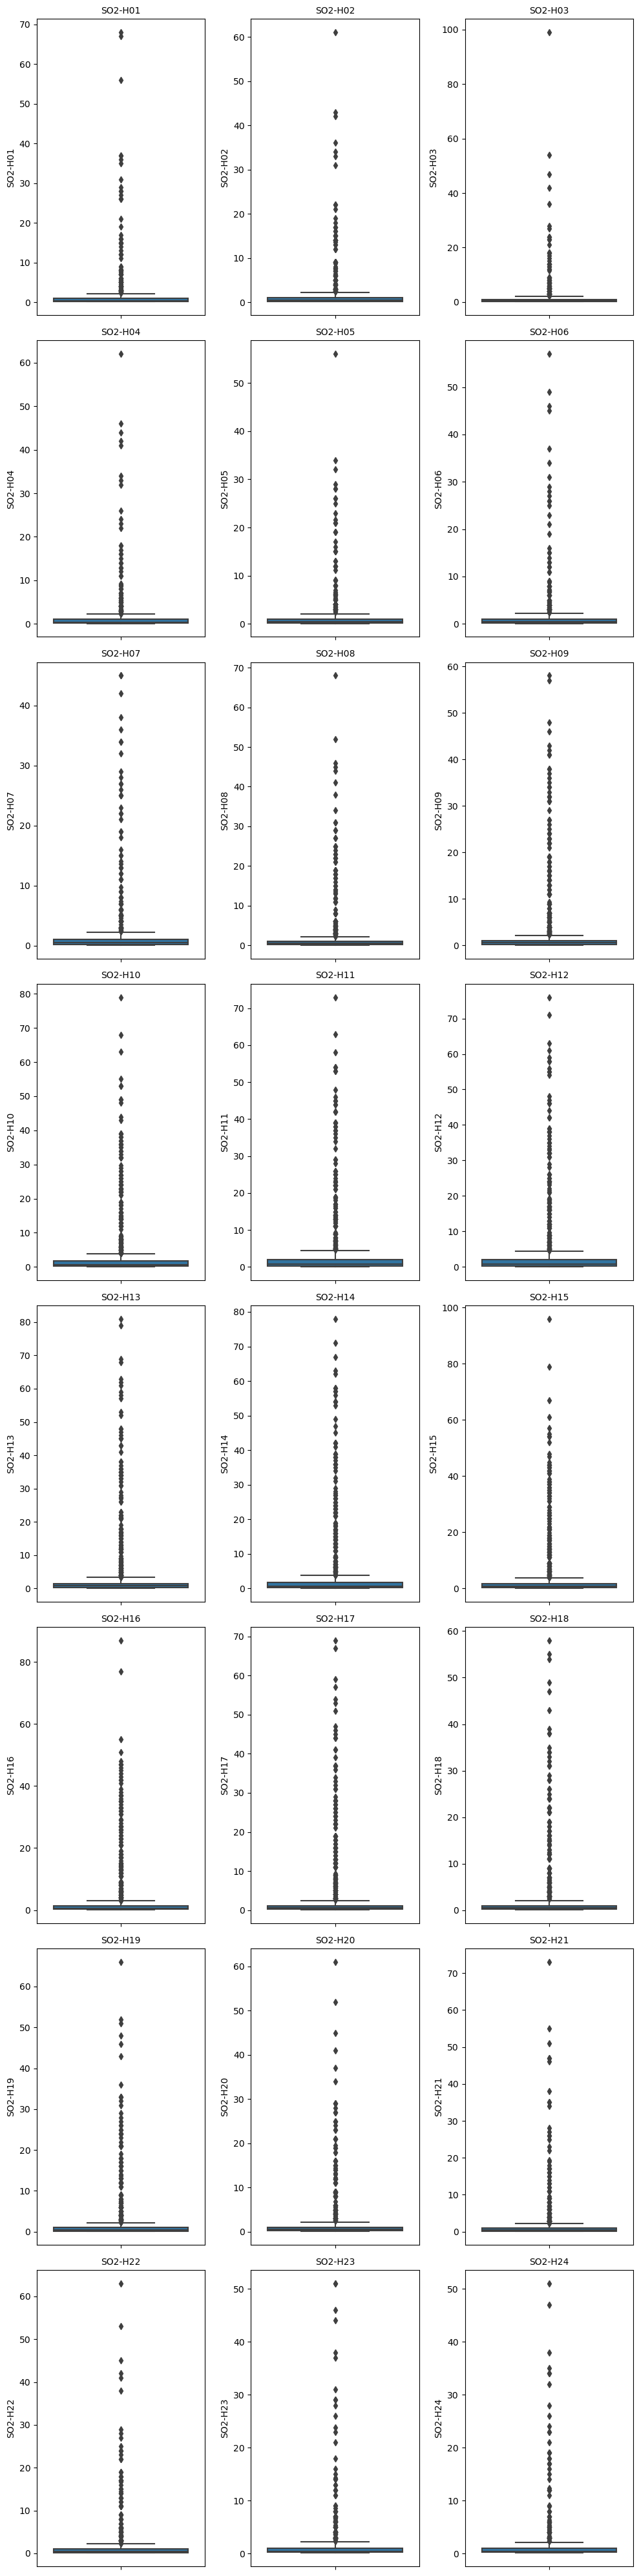

In [19]:
# Columns listed to create box plots.
columns_p = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()


### Displayed Box plots for Carbon Monoxide Columns to find outliers. 

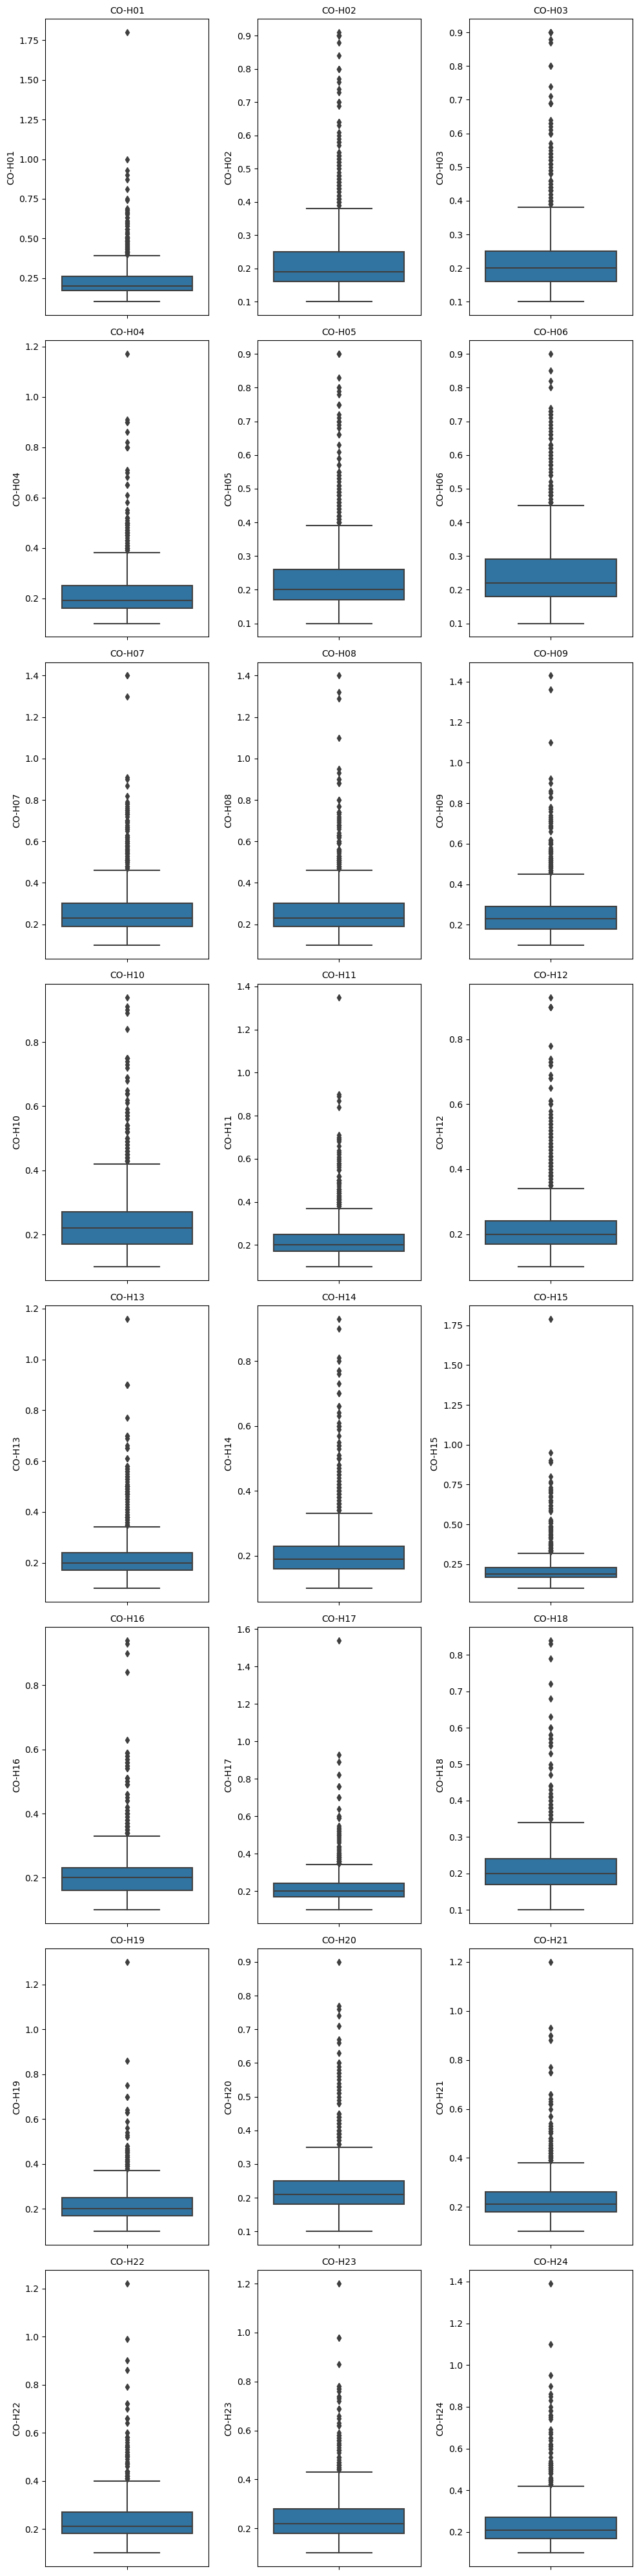

In [20]:
# Columns listed to create box plots.
columns_p = ['CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()


### Displayed Box plots for Nitric oxide Columns to find outliers. 

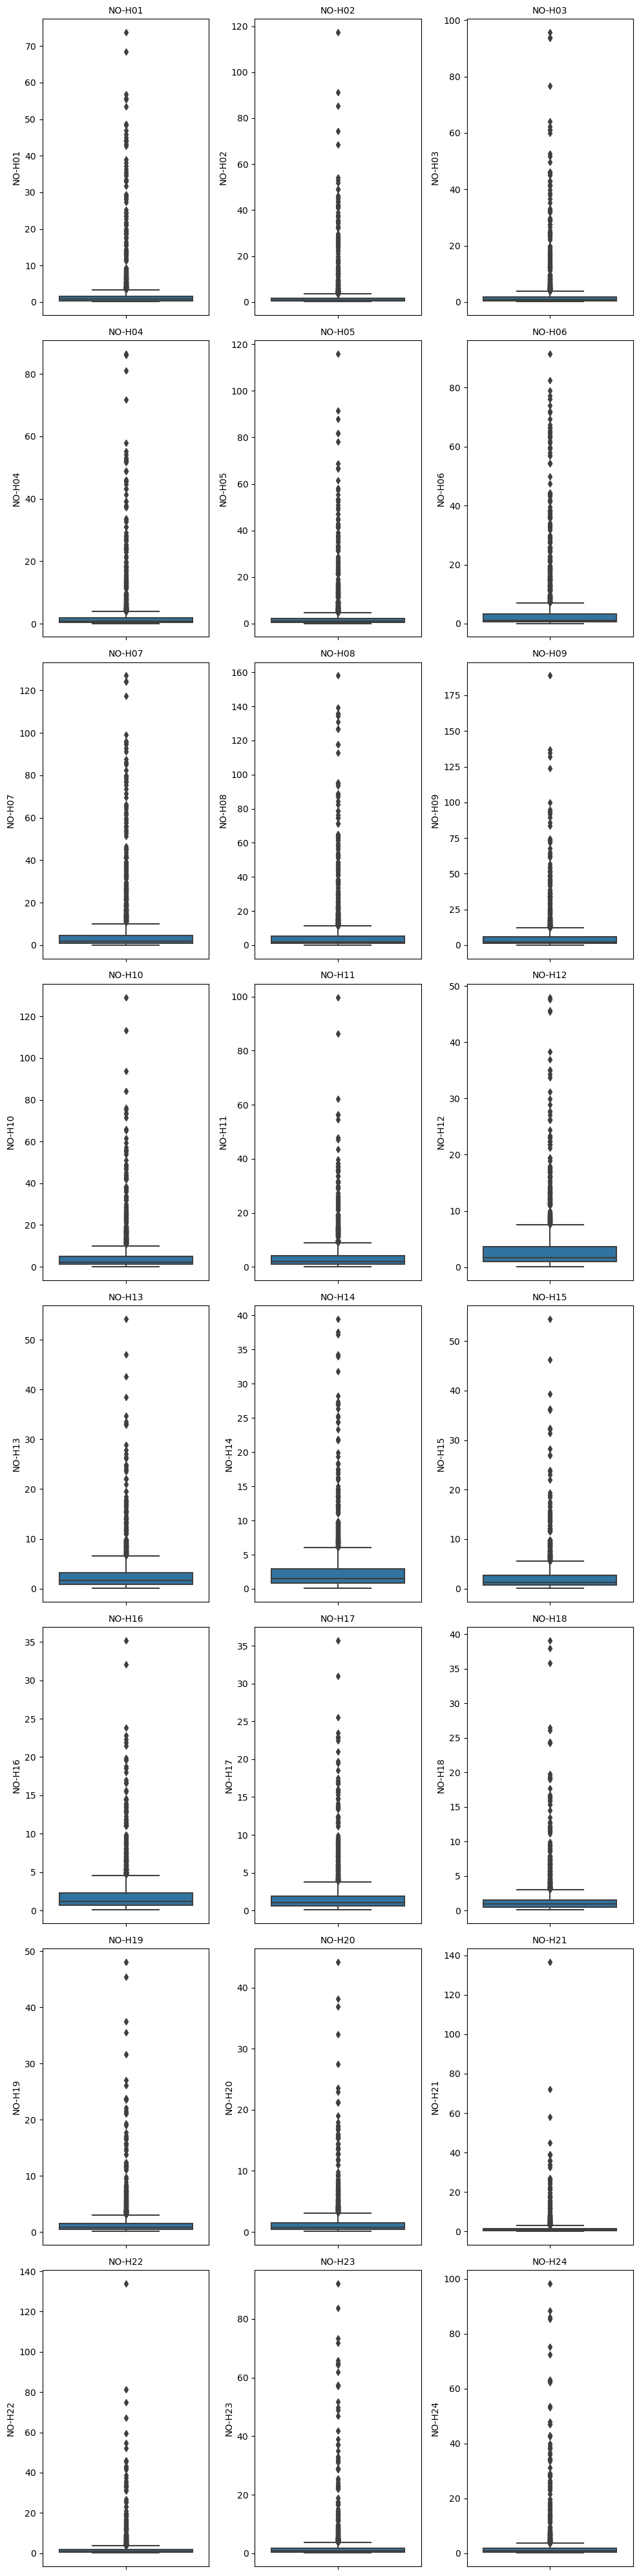

In [21]:
# Columns listed to create box plots.
columns_p = ['NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Nitrogen Dioxide Columns to find outliers. 

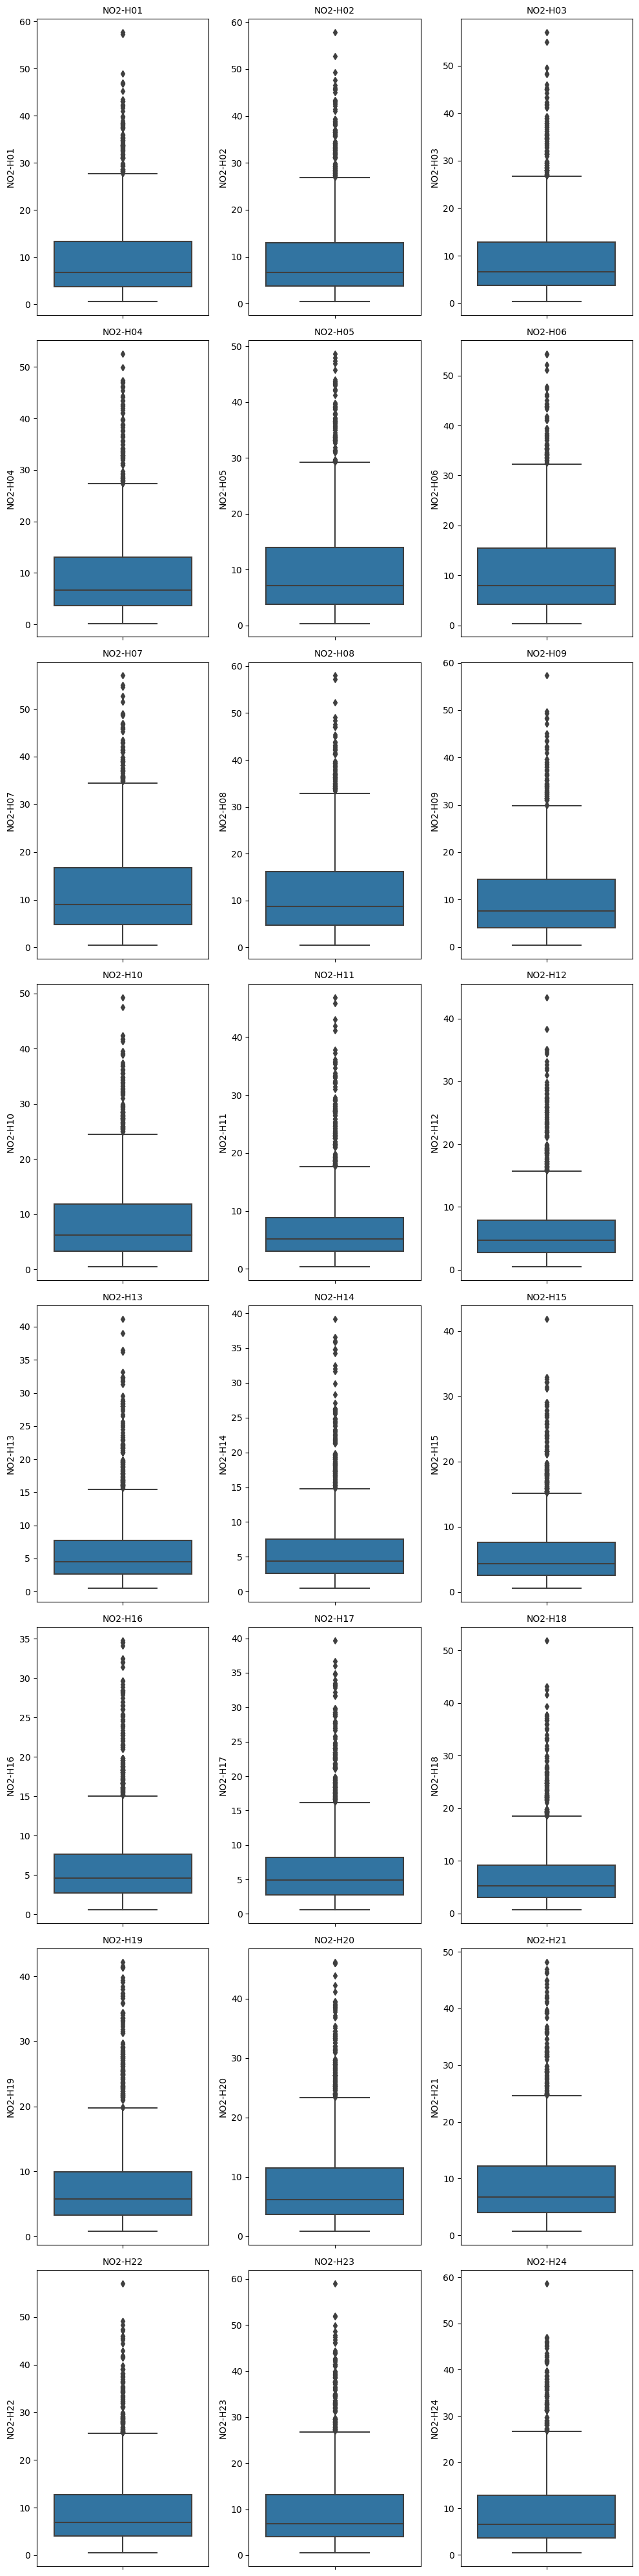

In [22]:
# Columns listed to create box plots.
columns_p = ['NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p// num_c)  #find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Ground Ozone level Columns to find outliers. 

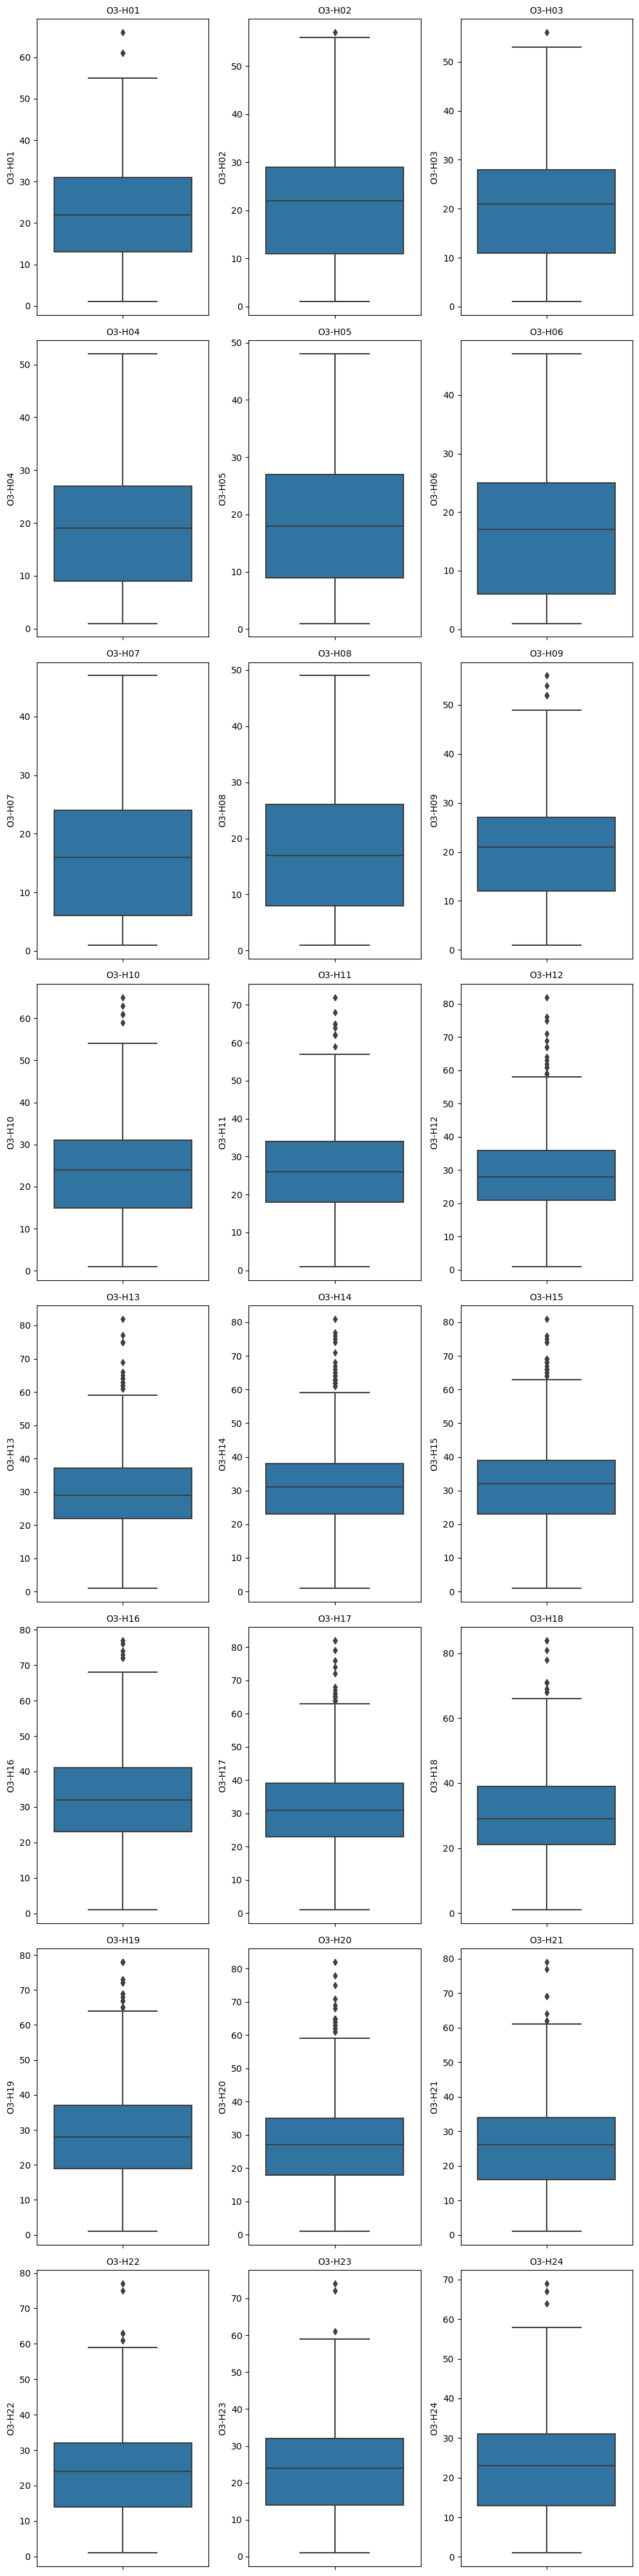

In [23]:
# Columns listed to create box plots.
columns_p = ['O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Particulate Matter (PM2.5) Columns to find outliers. 

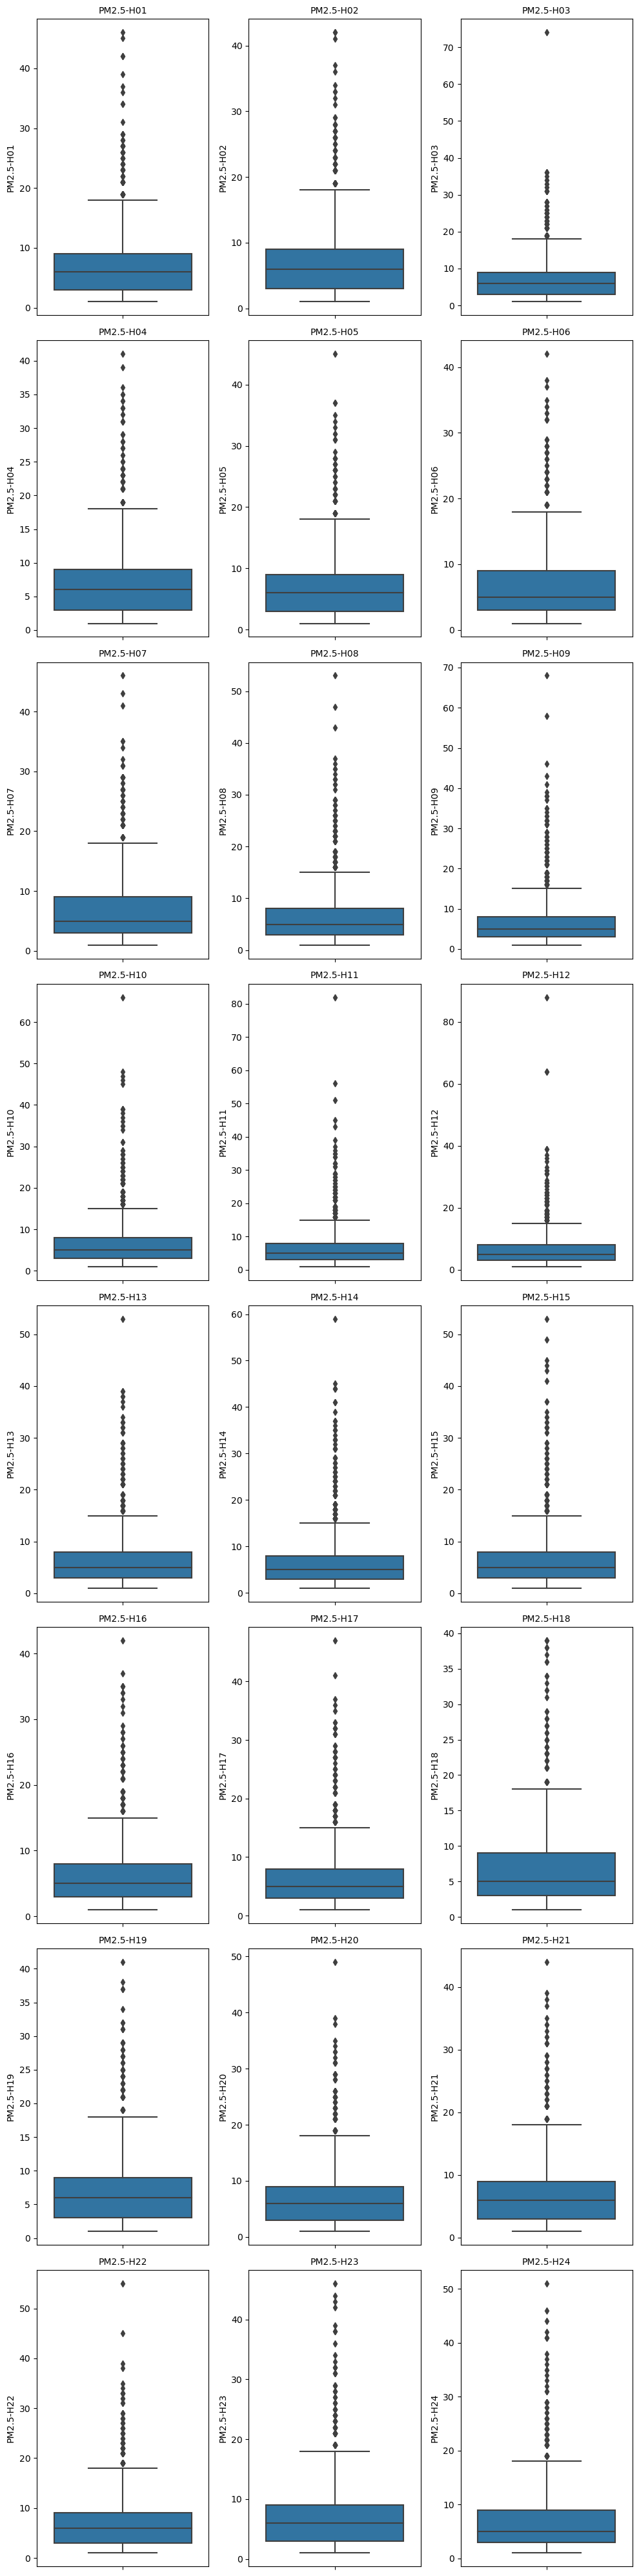

In [24]:
# Columns listed to create box plots.
columns_p = ['PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3 # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Nitrogen Oxide Columns to find outliers. 

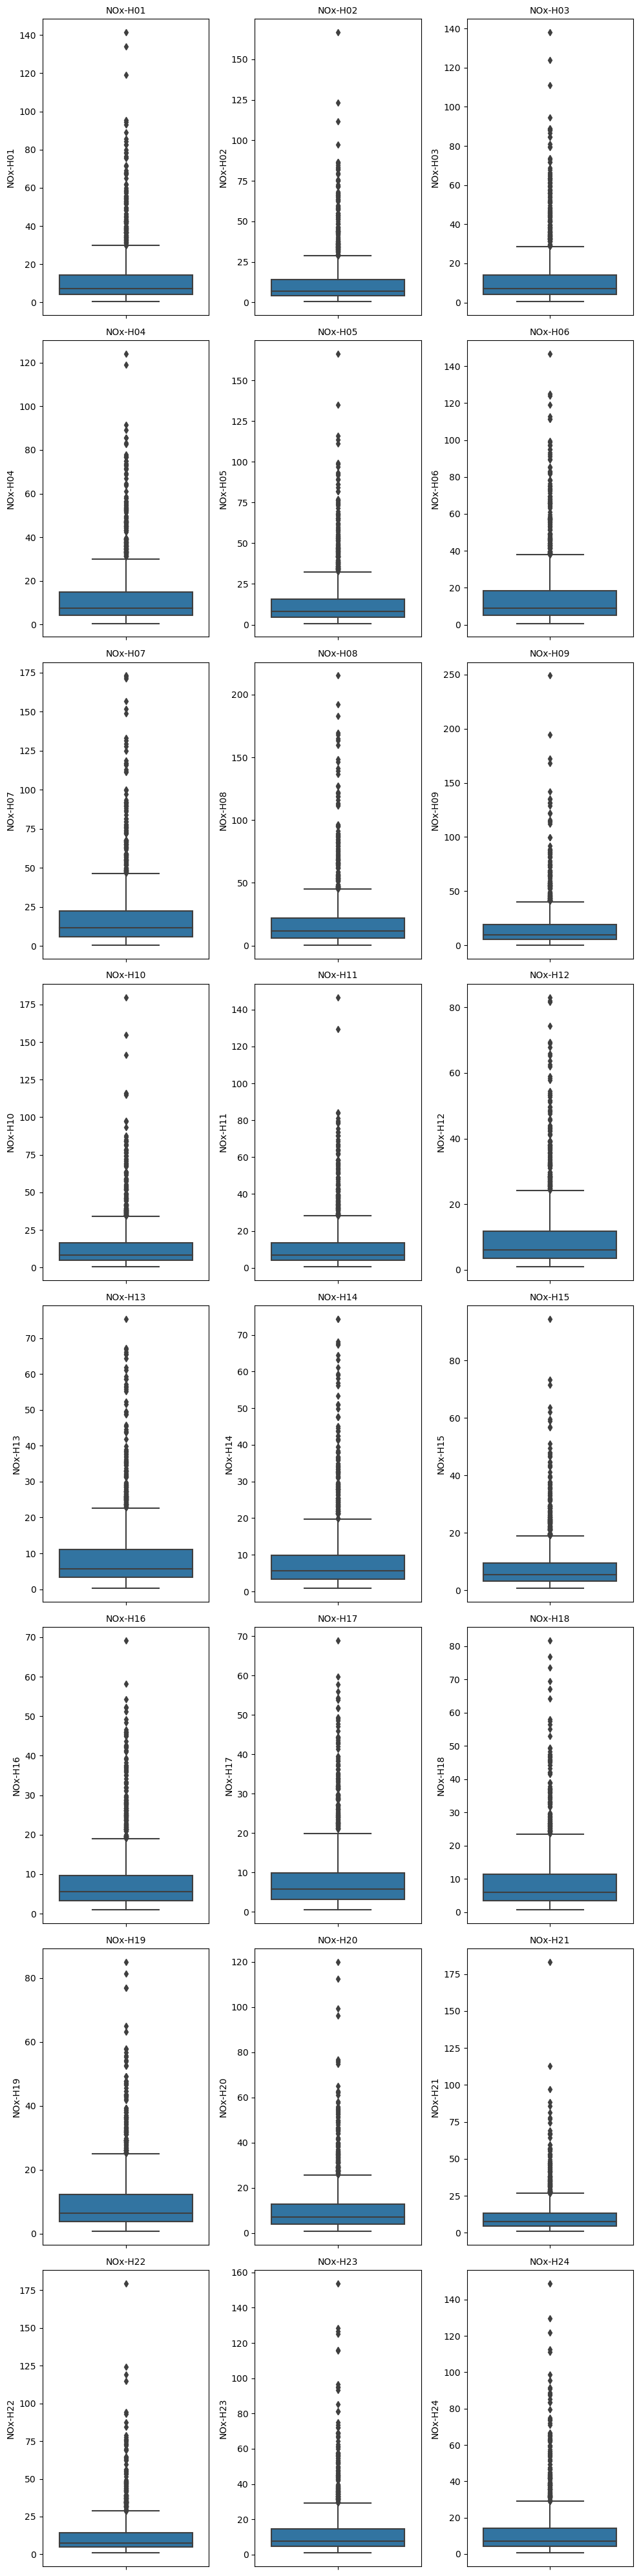

In [25]:
# Columns listed to create box plots.
columns_p = ['NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Fill the missing values with Mode.

In [26]:
# List of columns where you wish to use mode to fill in any empty cells.
columns_f = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']  # Add the columns you want to convert

# Iterate through the designated columns, filling blank spaces with the mode.
for column in columns_f:
    mode = df[column].mode()[0]  # Calculate the Mode.
    df[column].fillna(mode, inplace=True)  # Fill all empty cells with mode.

# Save the updated DataFrame after filling missing values back to a CSV file.
df.to_csv('updated_file.csv', index=False)


print(df)

                  City       Date   SO2-H01  SO2-H02  SO2-H03  SO2-H04  \
0      Ottawa Downtown  2022-01-01      0.6      0.5      0.5      0.4   
1      Ottawa Downtown  2022-01-02      0.3      0.3      0.3      0.3   
2      Ottawa Downtown  2022-01-03      0.3      0.4      0.4      0.3   
3      Ottawa Downtown  2022-01-04      0.4      0.5      0.4      0.4   
4      Ottawa Downtown  2022-01-05      0.4      0.4      0.4      0.4   
...                ...         ...      ...      ...      ...      ...   
2185  Windsor Downtown  2022-12-27      0.8      0.8      0.7      0.7   
2186  Windsor Downtown  2022-12-28      0.1      0.2      0.2      0.3   
2187  Windsor Downtown  2022-12-29      0.5      0.5      0.5      0.5   
2188  Windsor Downtown  2022-12-30      0.2      0.3      0.3      0.2   
2189  Windsor Downtown  2022-12-31      0.1      0.1      0.1      0.1   

      SO2-H05  SO2-H06  SO2-H07  SO2-H08  ...  NOx-H15  NOx-H16  NOx-H17  \
0         0.5      0.5      0.4    

In [27]:
100 - (len(df.dropna())/len(df))*100

0.0

### Fixing Outliers using Interquartile Range method

In [28]:
columns_f = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']  # Add the columns you want to convert

# Iterate through the columns & fix outliers using the Interquartile Range method.
for column in columns_f:
    
    # Calculate the Q1 & Q3.
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range).
    IQR = Q3 - Q1
    
    # Formula for lower & upper bounds to find outliers.
    l_bound = Q1 - 1.5 * IQR
    u_bound = Q3 + 1.5 * IQR
    
    # Find and replace outliers with values within the bounds.
    df[column] = df[column].apply(lambda x: x if l_bound <= x <= u_bound else df[column].median())

# New DataFrame with fixed outliers to a new CSV file.
df.to_csv('fixed_outliers_file.csv', index=False)


In [29]:
df

City       Date   SO2-H01  SO2-H02  SO2-H03  SO2-H04  \
0      Ottawa Downtown  2022-01-01      0.6      0.5      0.5      0.4   
1      Ottawa Downtown  2022-01-02      0.3      0.3      0.3      0.3   
2      Ottawa Downtown  2022-01-03      0.3      0.4      0.4      0.3   
3      Ottawa Downtown  2022-01-04      0.4      0.5      0.4      0.4   
4      Ottawa Downtown  2022-01-05      0.4      0.4      0.4      0.4   
...                ...         ...      ...      ...      ...      ...   
2185  Windsor Downtown  2022-12-27      0.1      0.8      0.1      0.1   
2186  Windsor Downtown  2022-12-28      0.1      0.2      0.2      0.3   
2187  Windsor Downtown  2022-12-29      0.5      0.5      0.5      0.5   
2188  Windsor Downtown  2022-12-30      0.2      0.3      0.3      0.2   
2189  Windsor Downtown  2022-12-31      0.1      0.1      0.1      0.1   

      SO2-H05  SO2-H06  SO2-H07  SO2-H08  ...  NOx-H15  NOx-H16  NOx-H17  \
0         0.5      0.5      0.4      0.4  ...      7.9      8.4      5.7   
1         0.3      0.3      0.3      0.3  ...      3.5      4.0      4.0   
2         0.3      0.3      0.3      0.3  ...      9.6      7.3      4.0   
3         0.4      0.6      0.5      0.5  ...     15.9      5.5      5.6   
4         0.4      0.4      0.5      0.4  ...      5.4     18.5      5.6   
...       ...      ...      ...      ...  ...      ...      ...      ...   
2185      0.1      0.6      0.7      0.6  ...      8.6      9.5      1.3   
2186      0.2      0.2      0.1      0.1  ...     11.0      1.8     14.2   
2187      0.4      0.3      0.2      0.2  ...     14.2     12.9     12.2   
2188      0.2      0.2      0.2      0.2  ...     11.6      9.5      9.4   
2189      0.1      0.1      0.1      0.1  ...      1.8      1.0      1.8   

      NOx-H18  NOx-H19  NOx-H20  NOx-H21  NOx-H22  NOx-H23  NOx-H24  
0         6.2      6.0      5.9      4.9     3.70      4.4      3.5  
1         3.8      3.6      3.6      3.1     3.80      3.8      3.2  
2        13.3     17.9     21.1      4.0     7.25      4.0     24.8  
3         5.9      6.2      6.8     21.4     5.00     24.2     27.2  
4         5.9      6.2     12.0     12.3    12.40      8.4      9.1  
...       ...      ...      ...      ...      ...      ...      ...  
2185      1.3      1.5      8.0      8.5     9.20      1.4      8.5  
2186     15.1      9.4      9.4      9.3     1.20      8.1      7.7  
2187     12.0     11.9      9.5      9.0     9.40      8.1      6.8  
2188      1.8     15.5     13.0      9.9    13.50      2.3     17.0  
2189     11.6     11.4      9.8     11.5     9.80      9.7      9.5  

[2190 rows x 170 columns]

### Displayed Box plots for Sulphur Dioxide Columns after fixing outliers. 

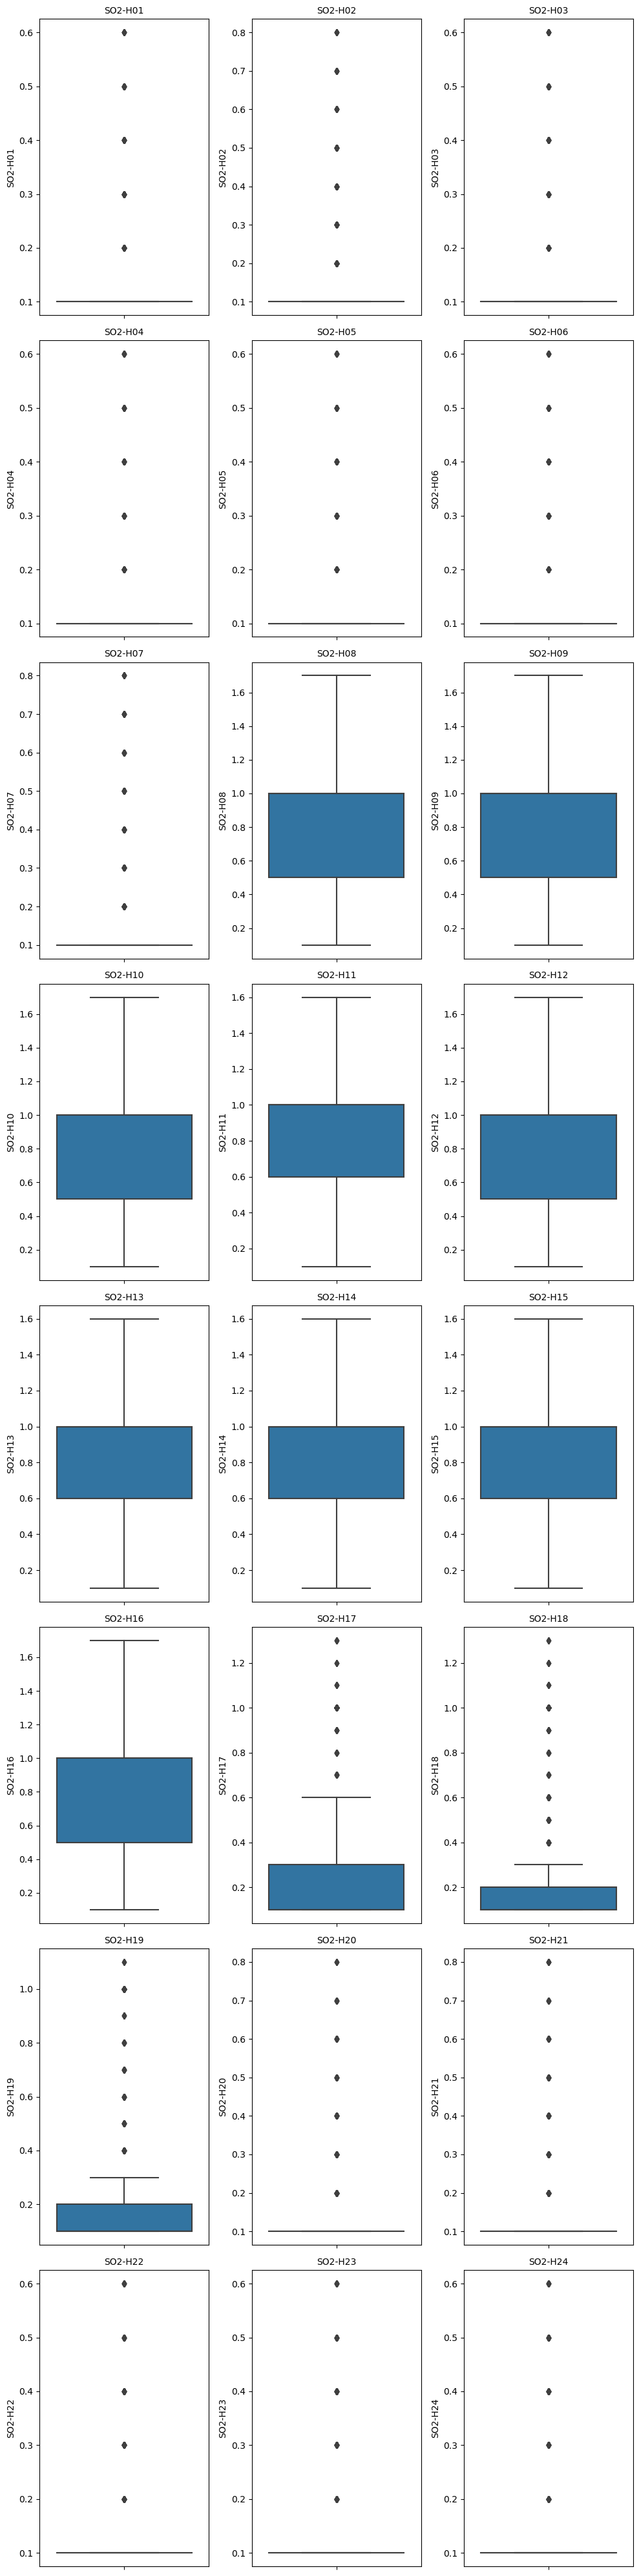

In [30]:
# Columns listed to create box plots.
columns_p = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Carbon Monoxide Columns after fixing outliers. 

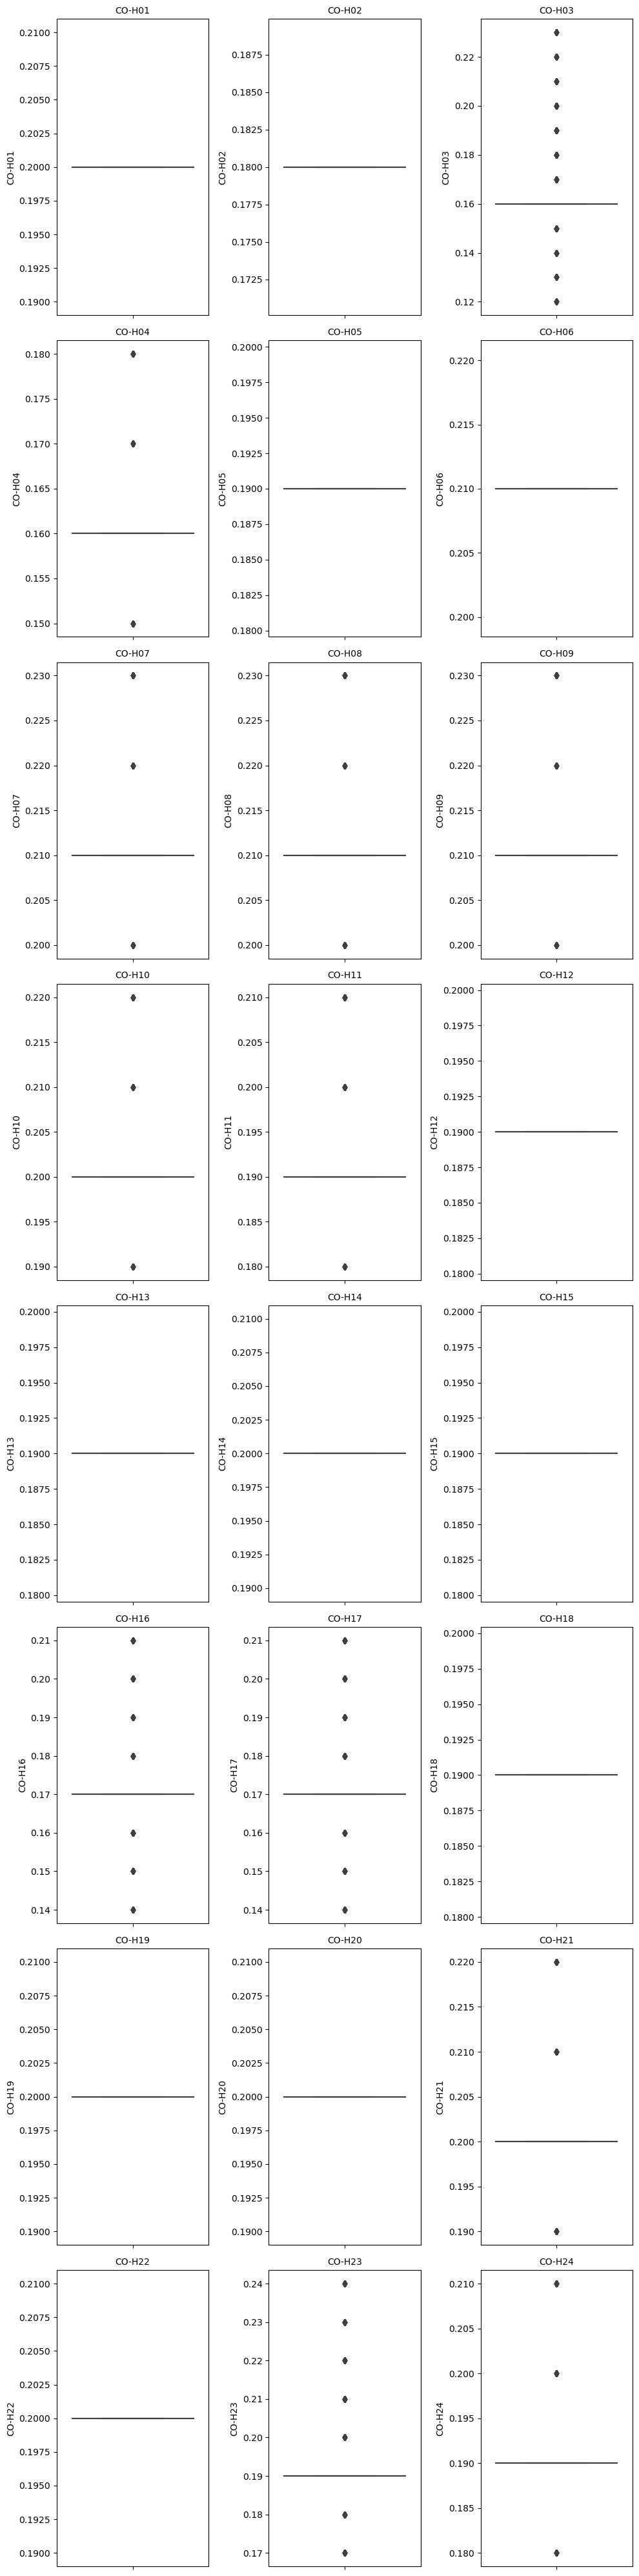

In [31]:
# Columns listed to create box plots.
columns_p = ['CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Nitric oxide Columns after fixing outliers. 

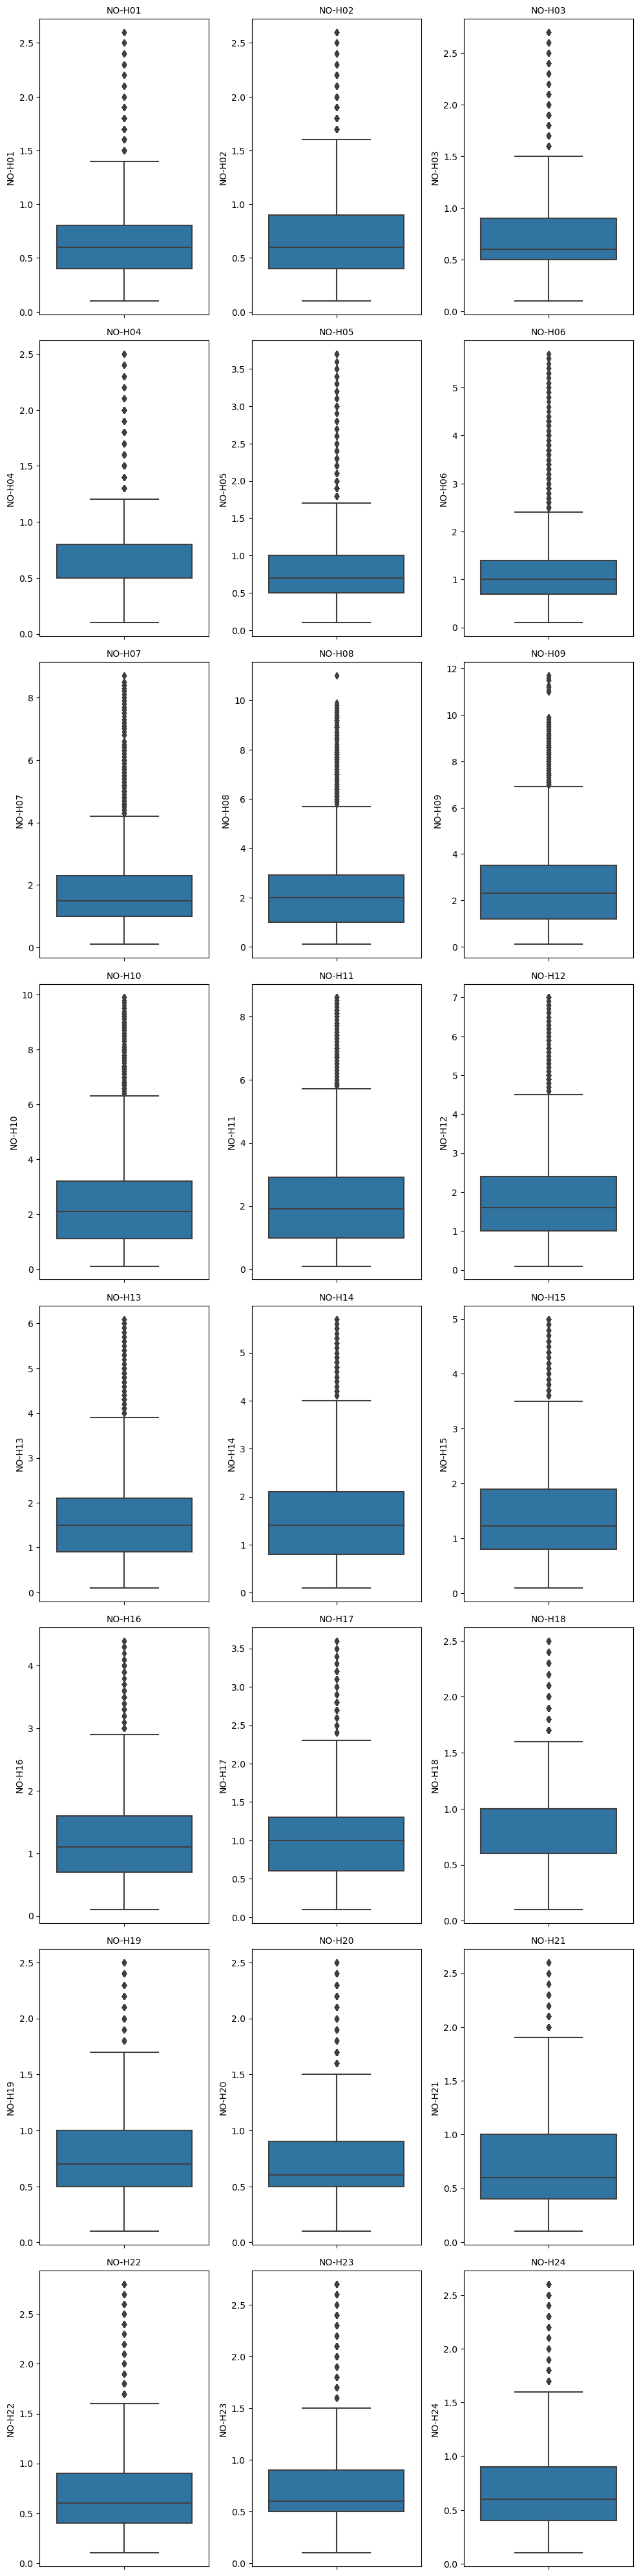

In [32]:
# Columns listed to create box plots.
columns_p = ['NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Nitrogen Dioxide Columns after fixing outliers. 

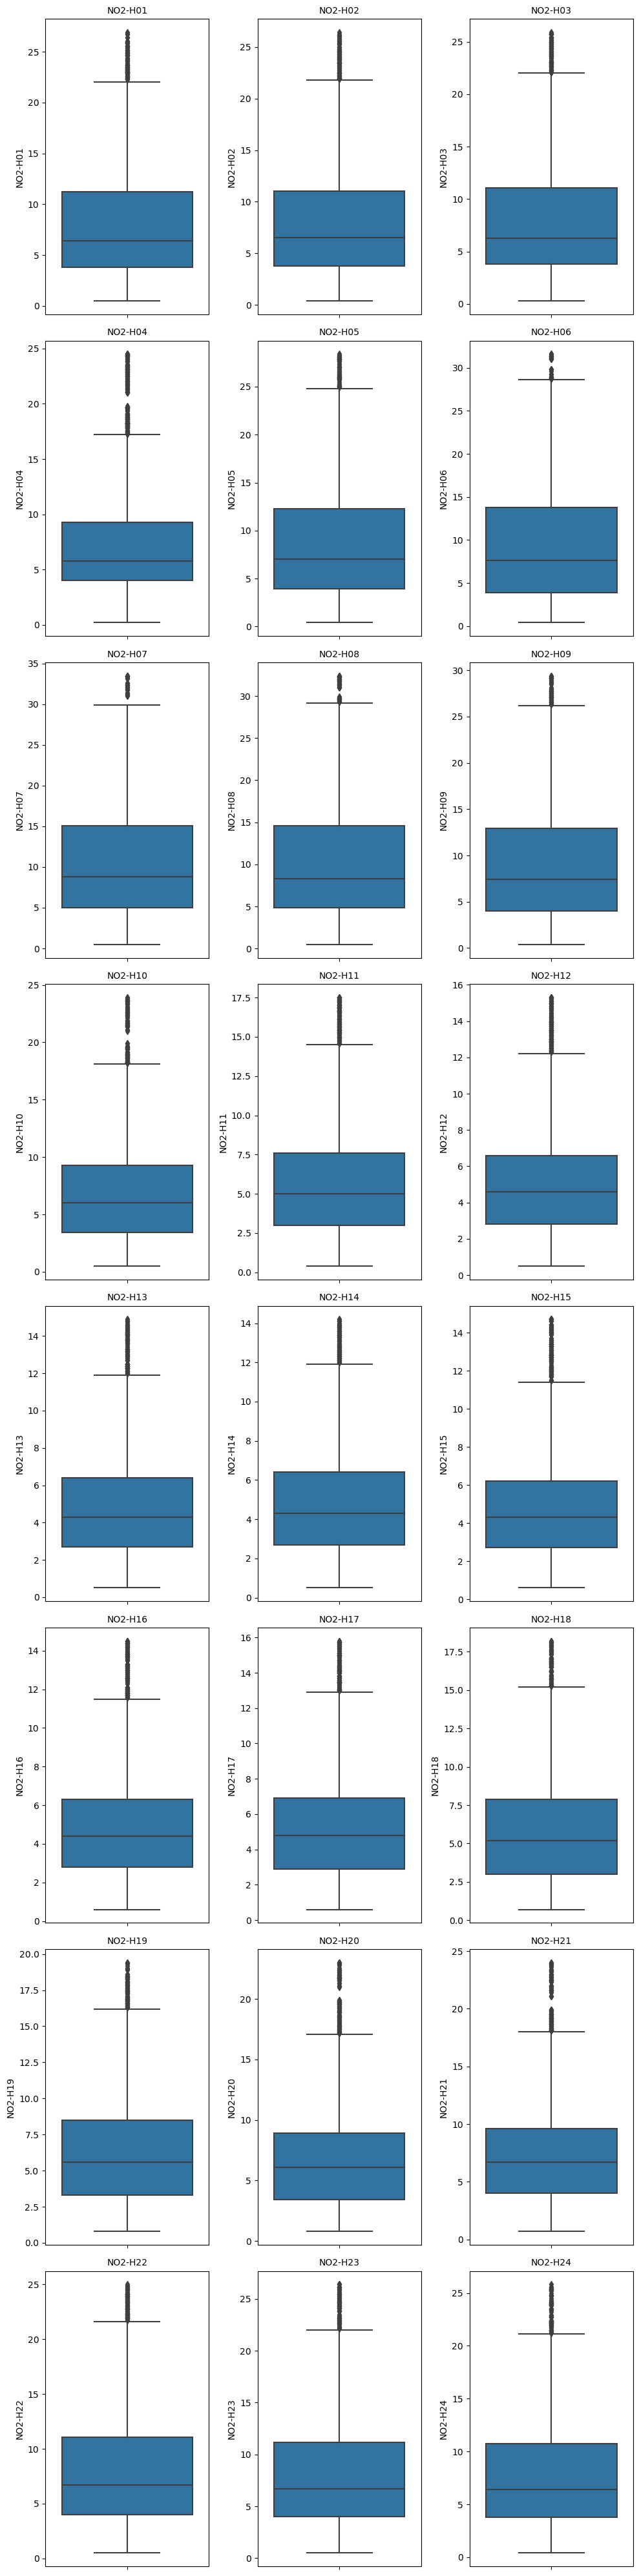

In [33]:
# Columns listed to create box plots.
columns_p = ['NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p// num_c)  #find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Ground Ozone level Columns after fixing outliers. 

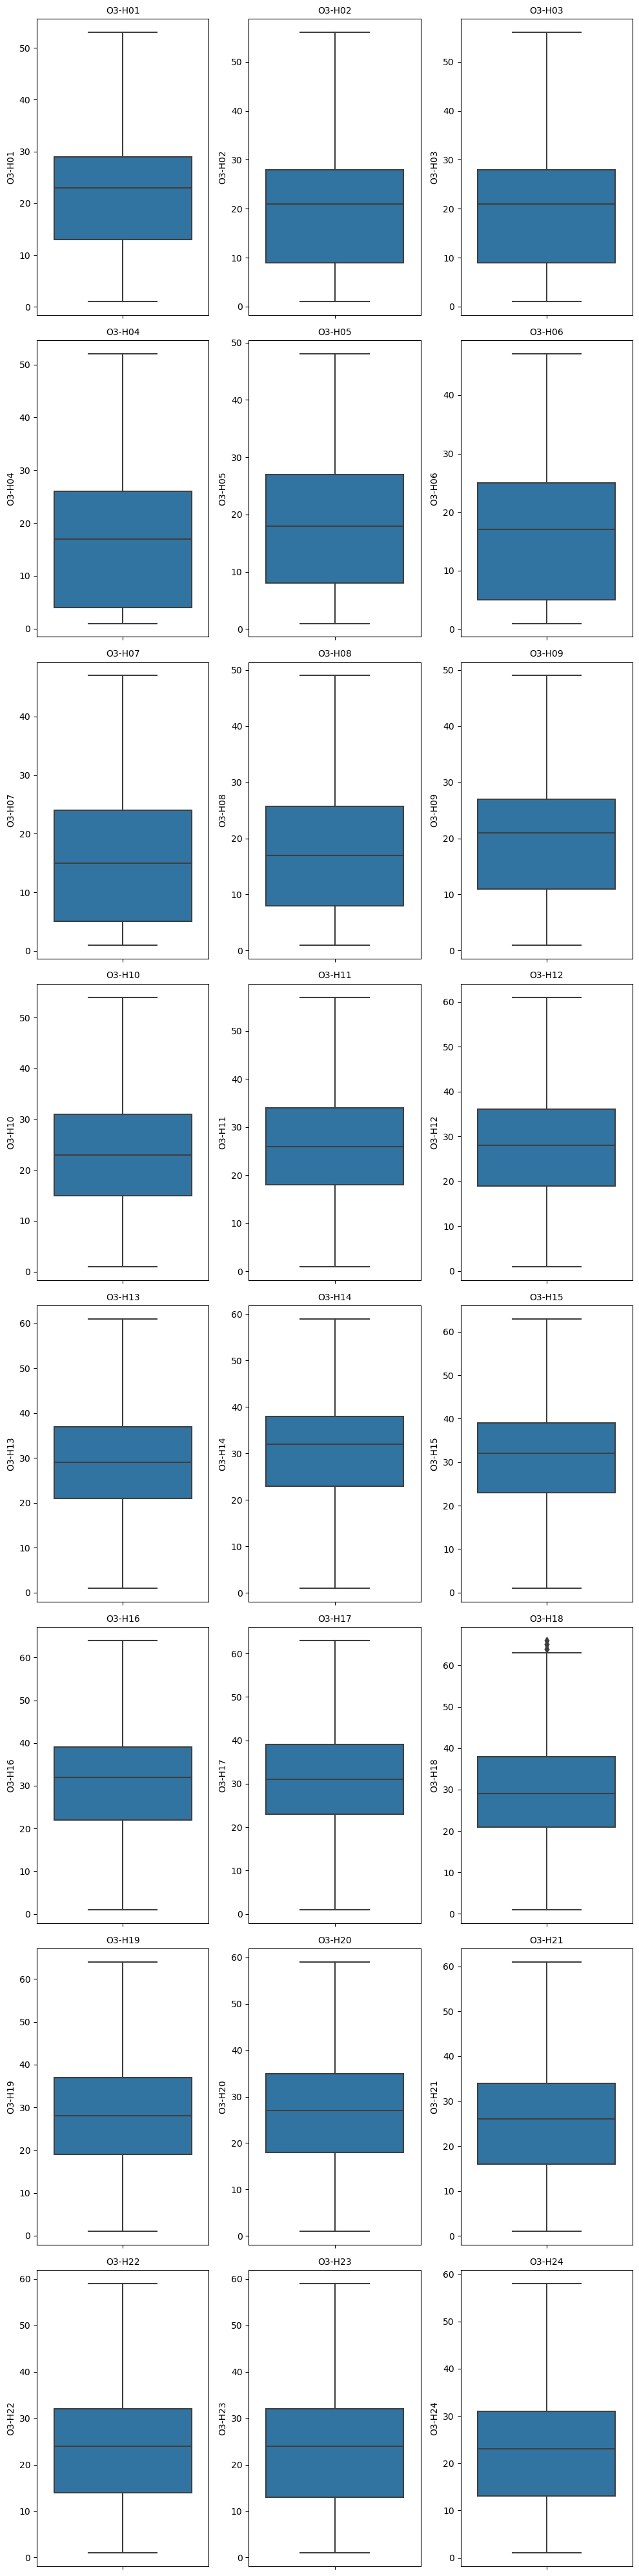

In [34]:
# Columns listed to create box plots.
columns_p = ['O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Particulate Matter (PM2.5) Columns after fixing outliers. 

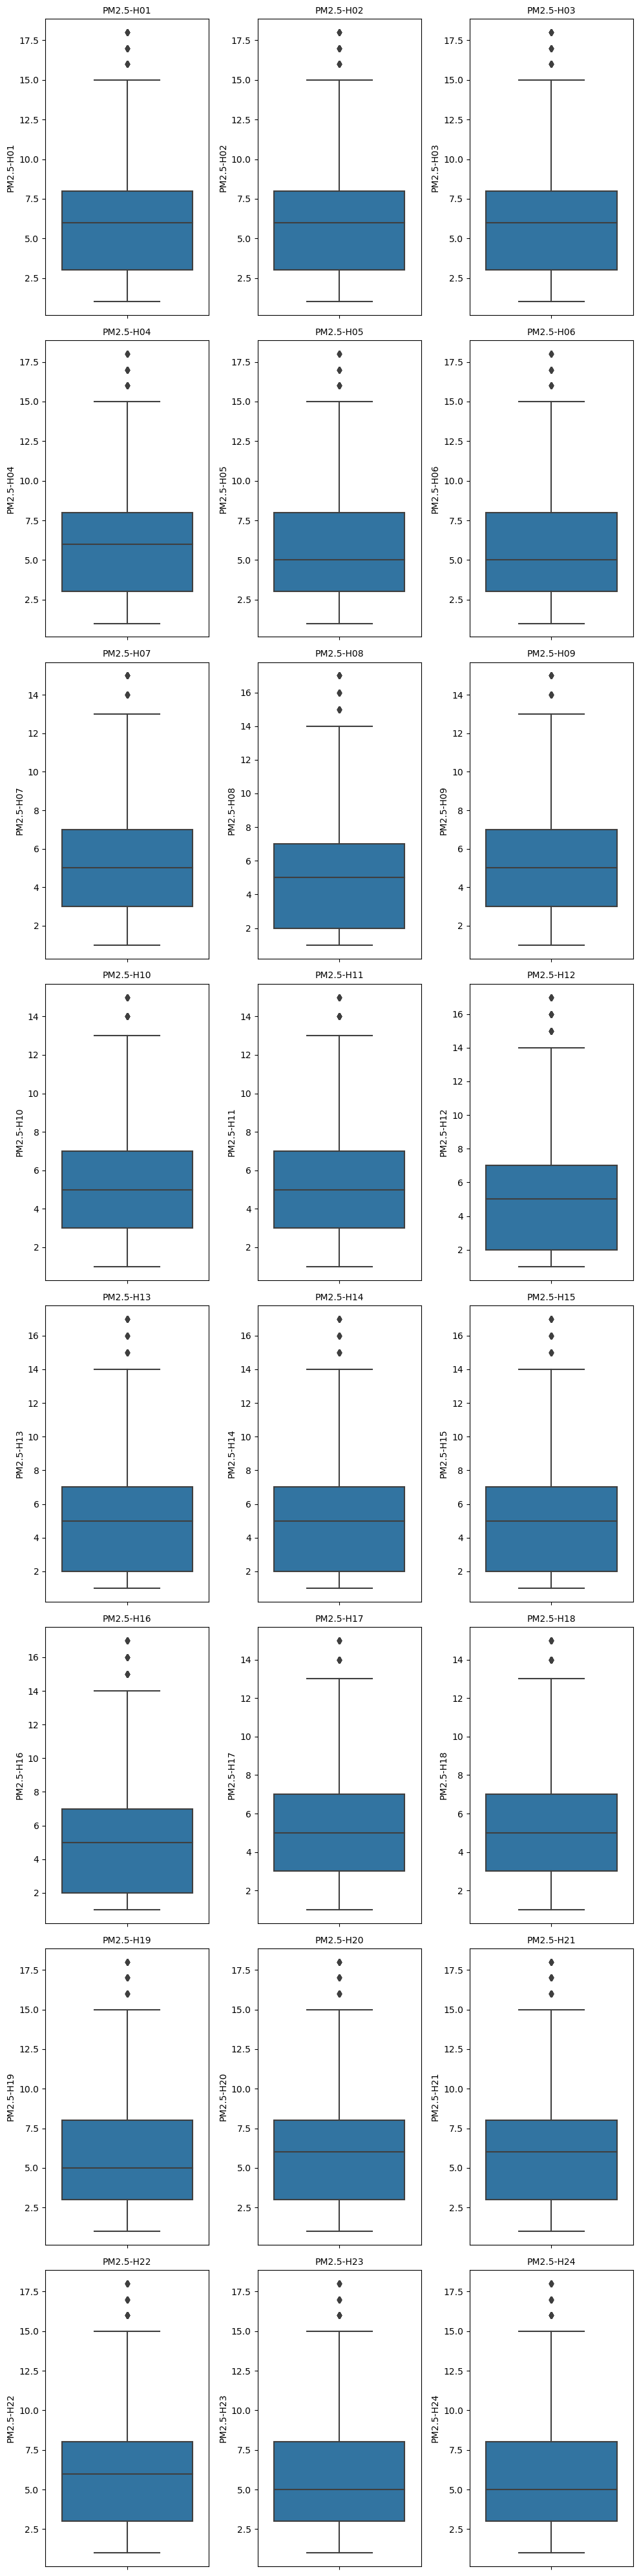

In [35]:
# Columns listed to create box plots.
columns_p = ['PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3 # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Displayed Box plots for Nitrogen Oxide Columns after fixing outliers. 

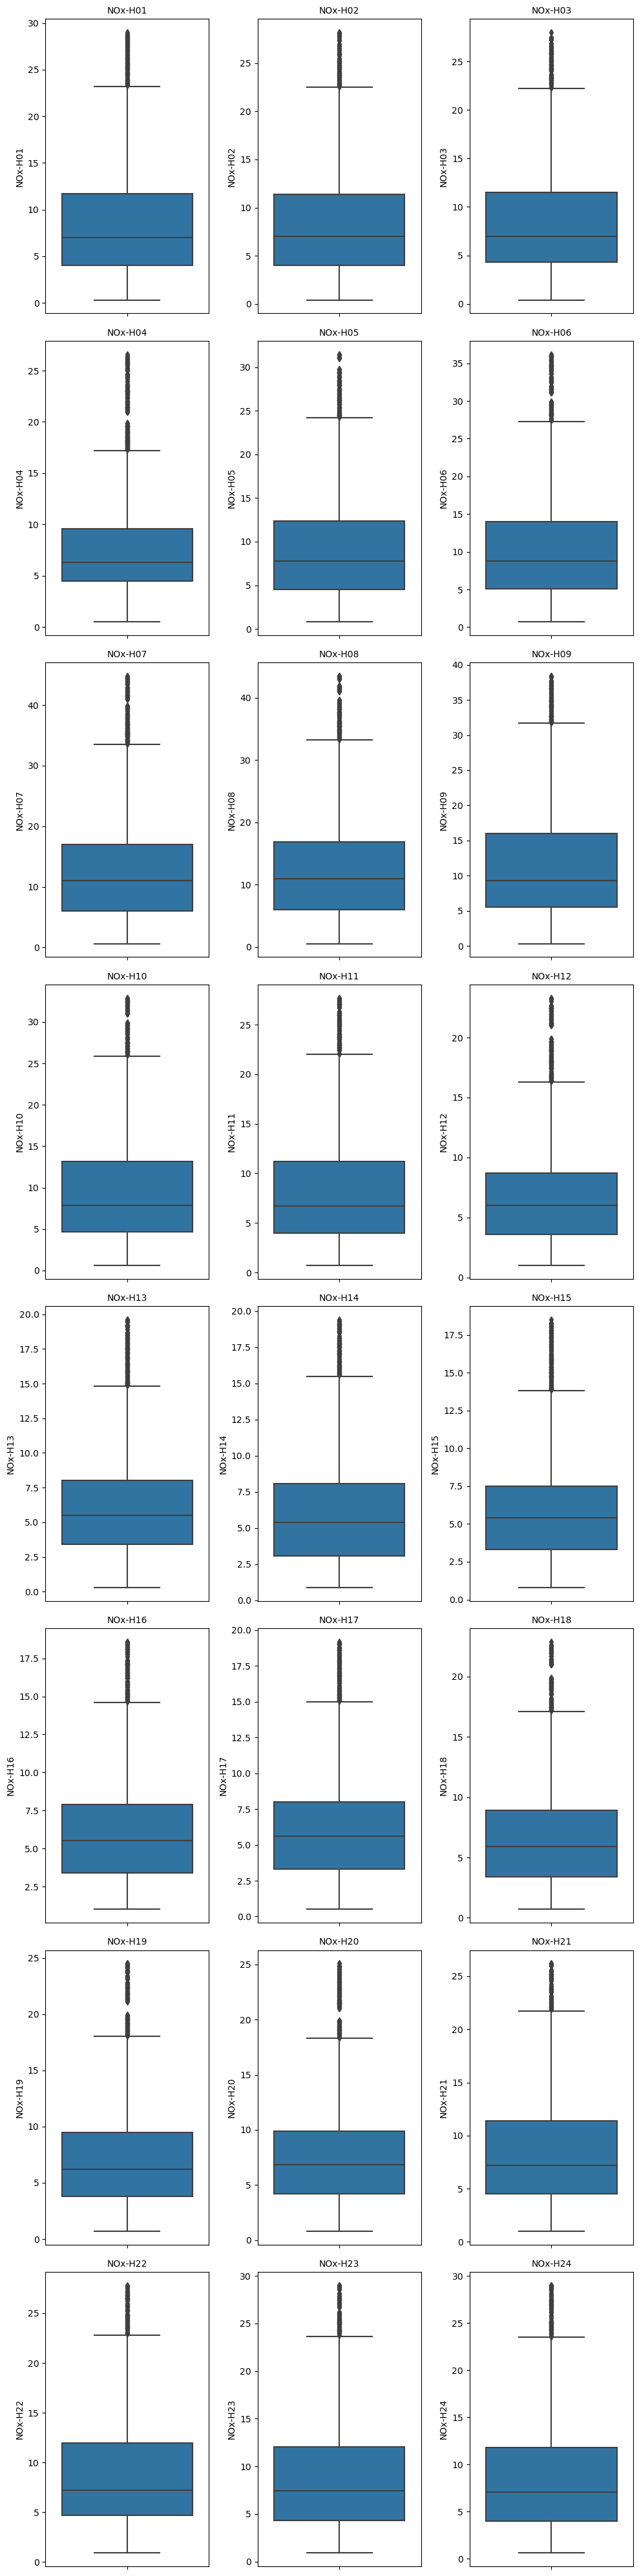

In [36]:
# Columns listed to create box plots.
columns_p = ['NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

In [37]:
plt.ion()

### Isolation Forest to fix Outliers.

In [38]:
columns_f = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24','CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24','NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24','NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24','O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24', 'PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24','NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']  # Add the columns you want to convert

# # IsolationForest UserWarning Suppression
warnings.simplefilter("ignore")

for column in columns_f:
    # Construct a model of an isolation forest.
    model = IsolationForest(contamination=0.05)  # Modify the parameter for contamination
    
    # Align the data to the model.
    model.fit(df[[column]])
    
    # Forecast the outliers (1 for the outliers, -1 for the inliers).
    outliers = model.predict(df[[column]])
    
    # Use the median value to replace outliers (you can customise this part)
    median_value = df[column].median()
    df.loc[outliers == -1, column] = median_value

# Restored warnings.
warnings.resetwarnings()

# Save the DataFrame with the corrected outliers.
# Replace 'cleaned_dataset.csv' with the new output filename
df.to_csv('cleaned_dataset.csv', index=False)

### Display Boxplots after fixing Outliers. 

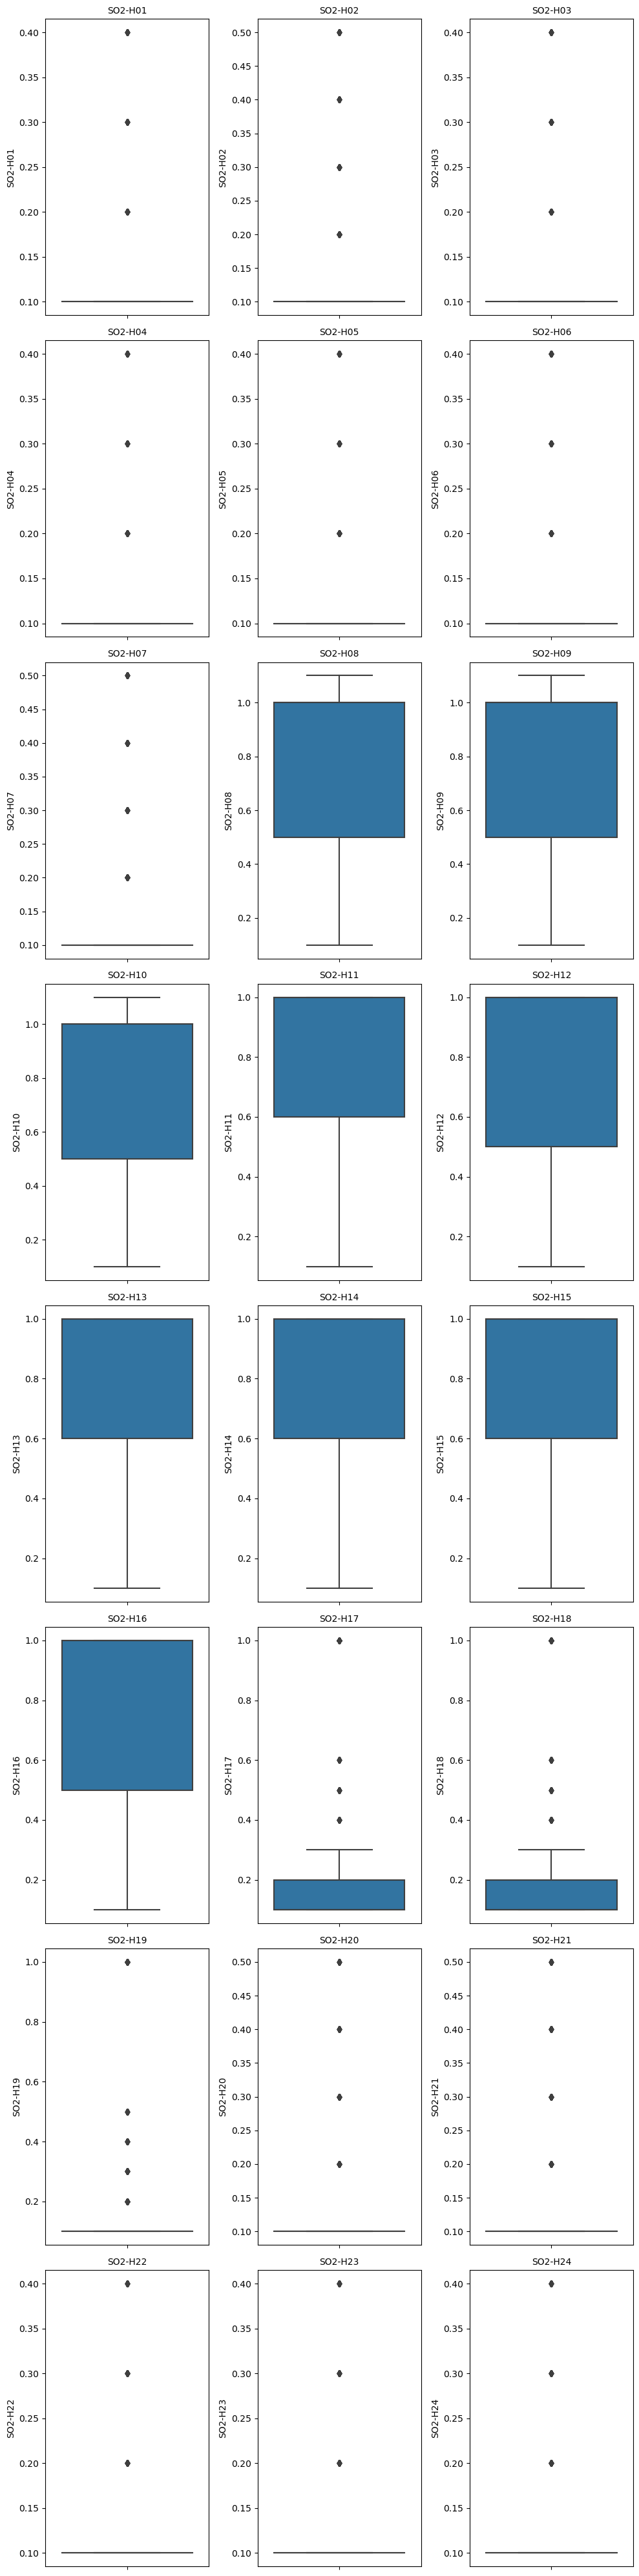

In [39]:
# Columns listed to create box plots.
columns_p = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()


### Display Boxplots after fixing Outliers. 

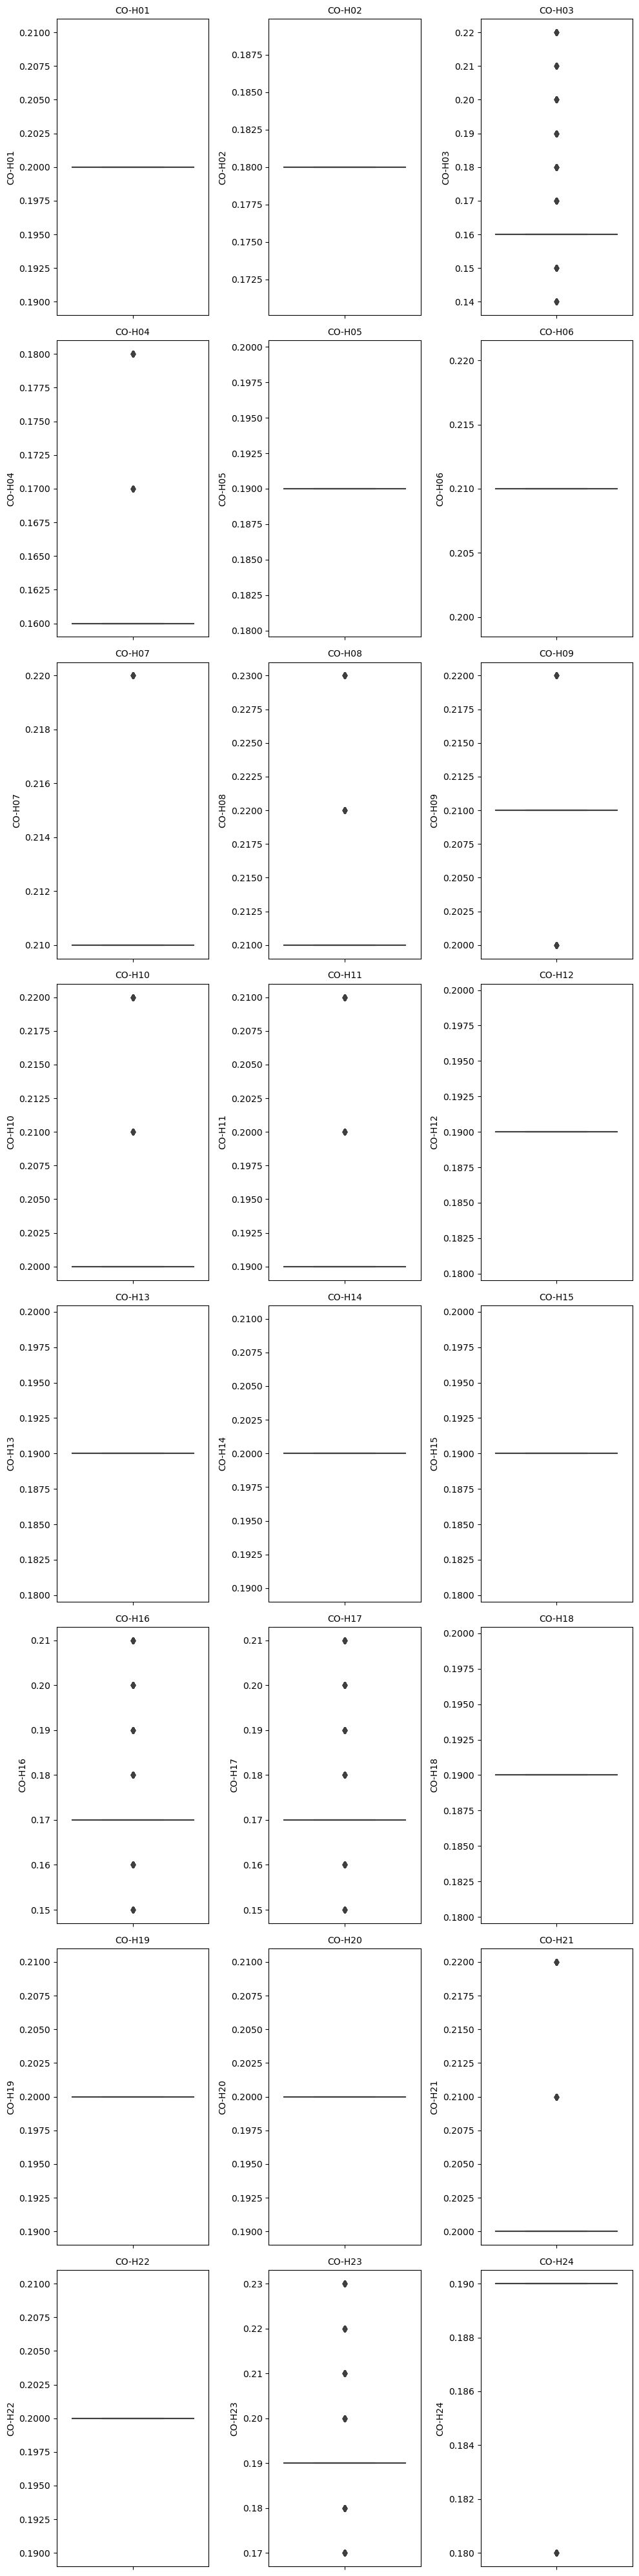

In [40]:
# Columns listed to create box plots.
columns_p = ['CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Display Boxplots after fixing Outliers. 

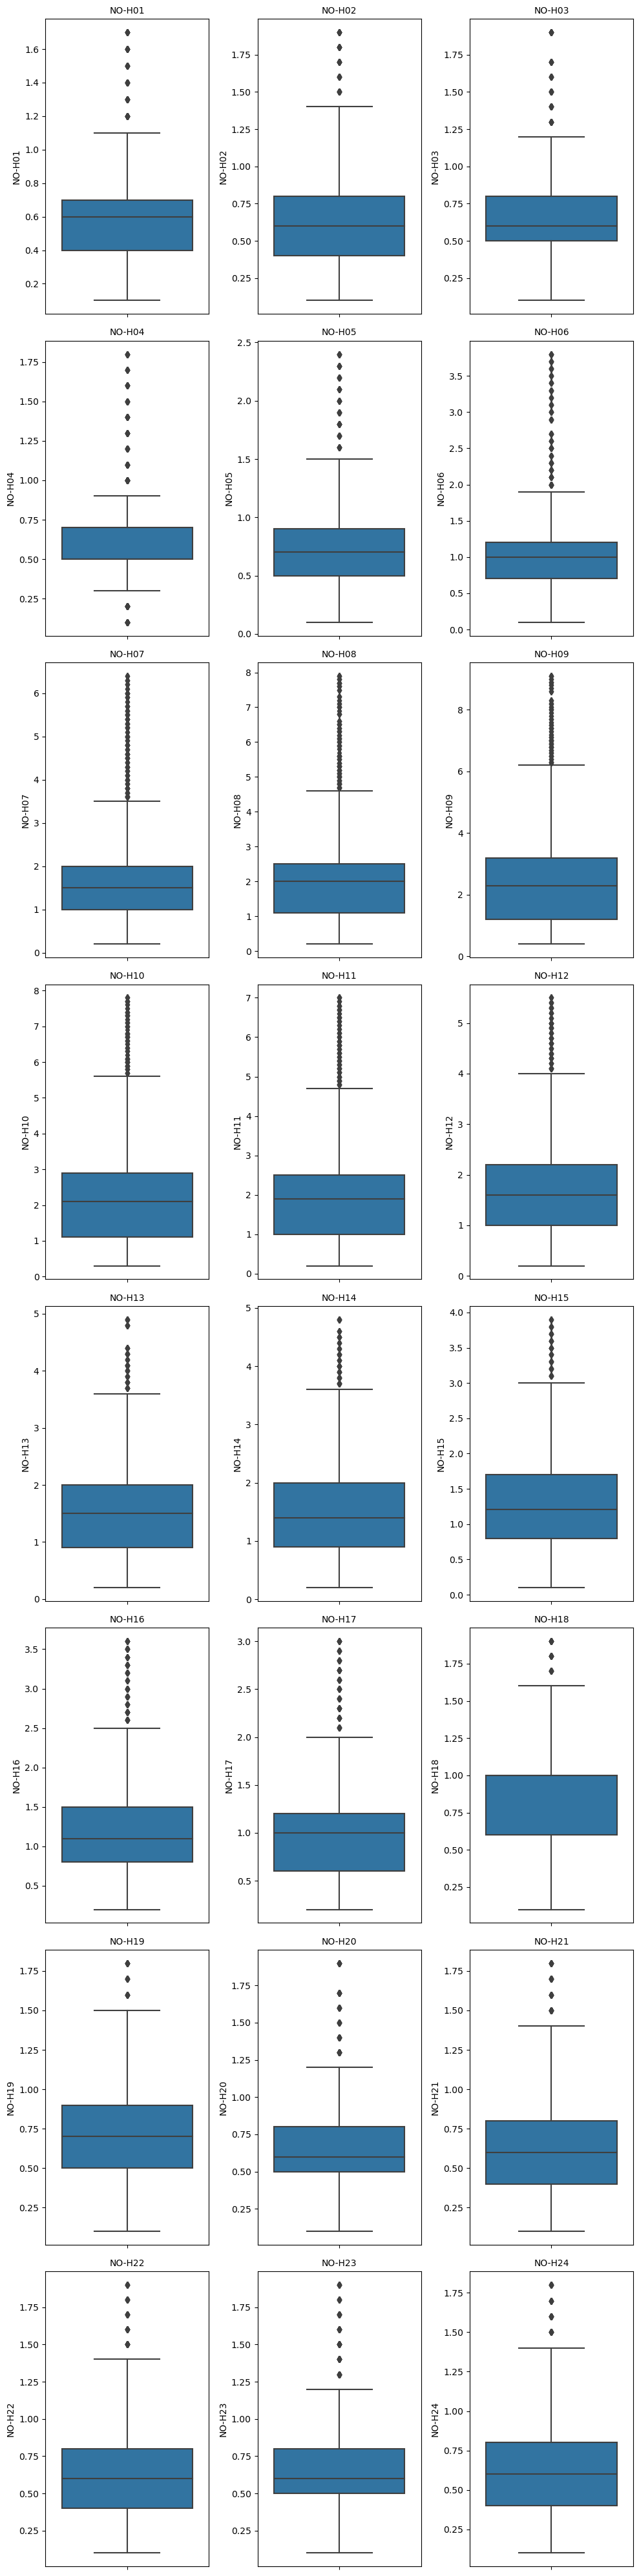

In [41]:
# Columns listed to create box plots.
columns_p = ['NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Display Boxplots after fixing Outliers. 

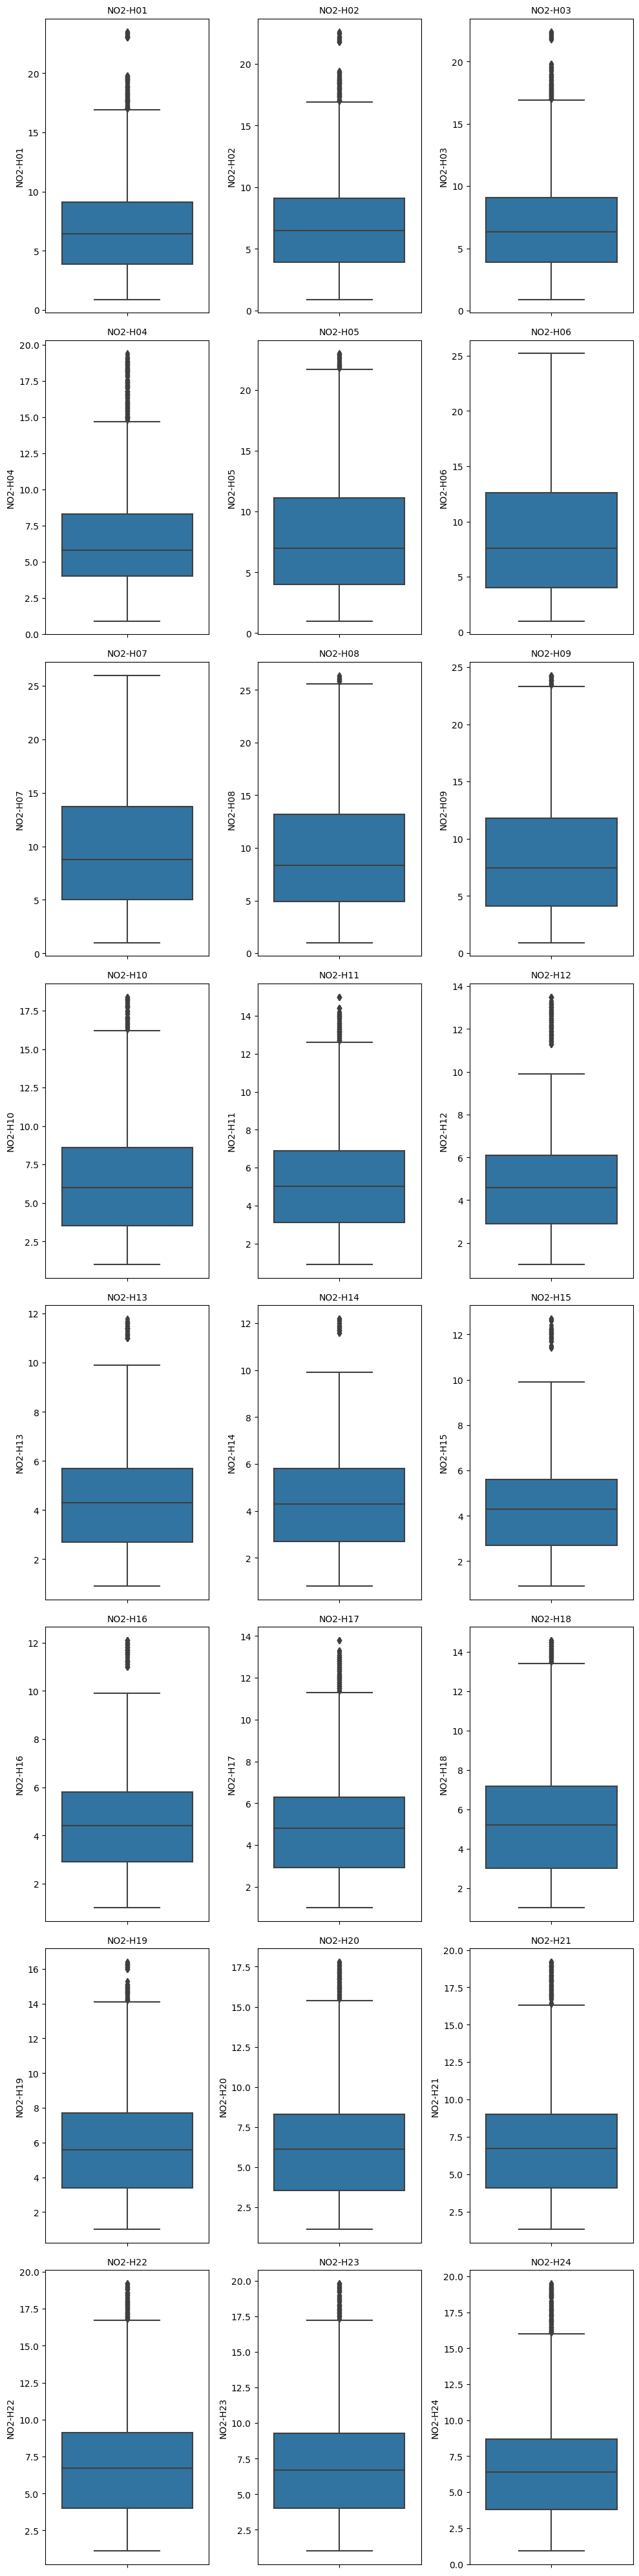

In [42]:
# Columns listed to create box plots.
columns_p = ['NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Display Boxplots after fixing Outliers. 

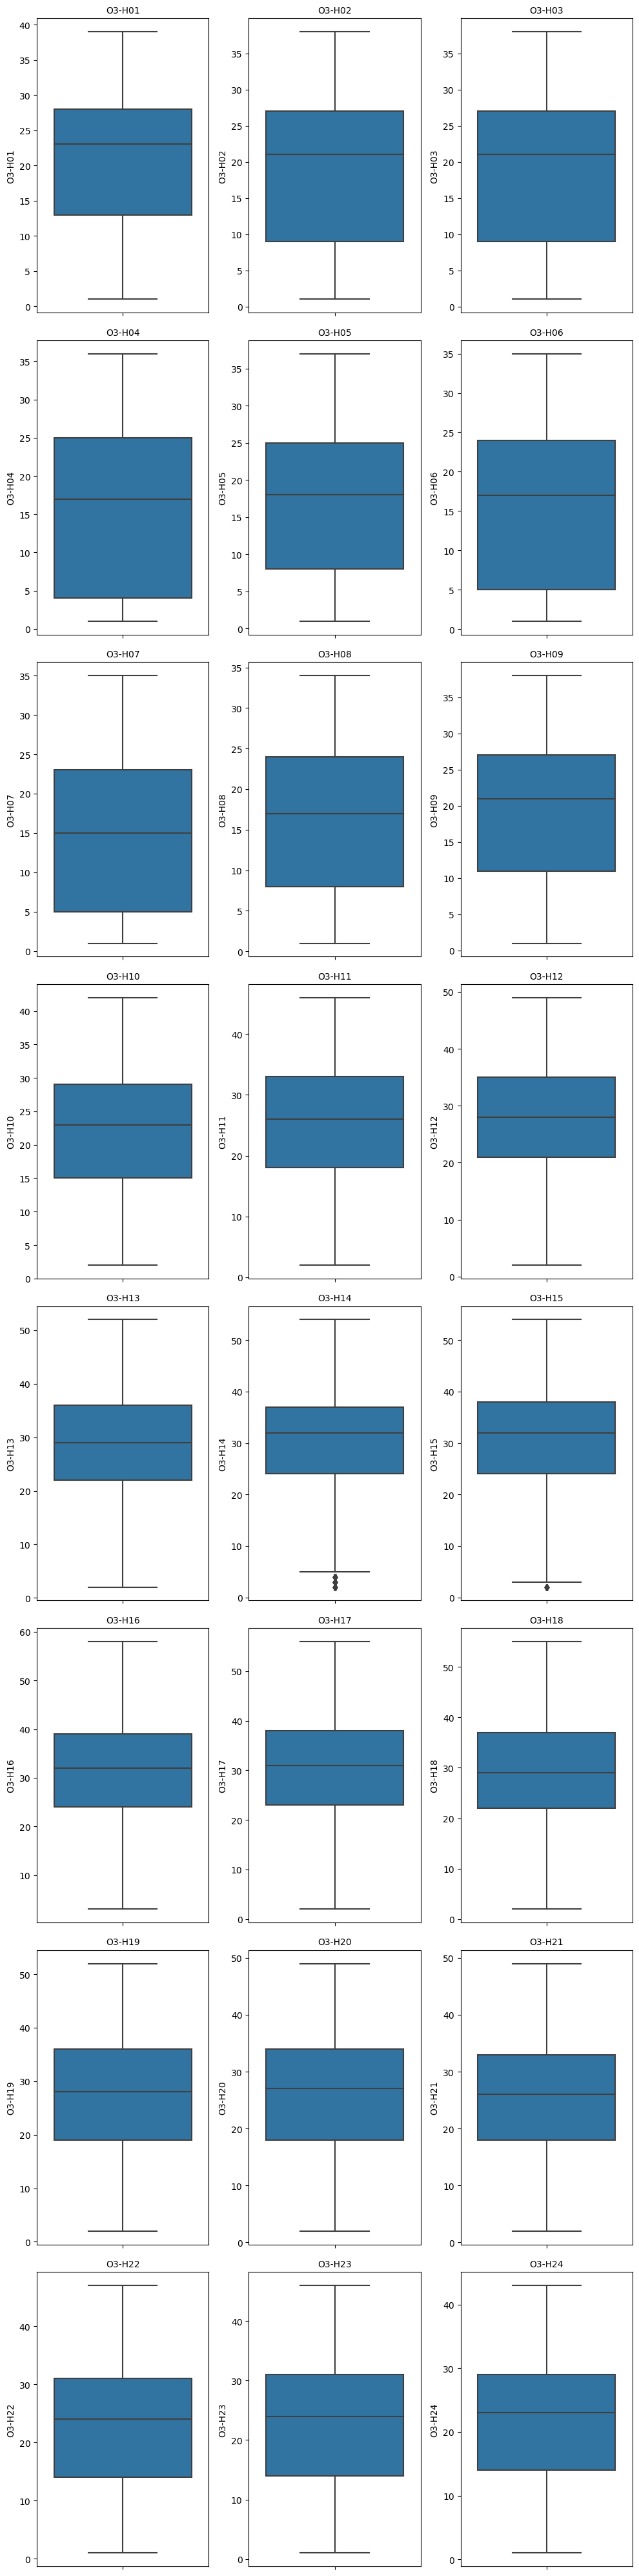

In [43]:
# Columns listed to create box plots.
columns_p = ['O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()

### Display Boxplots after fixing Outliers. 

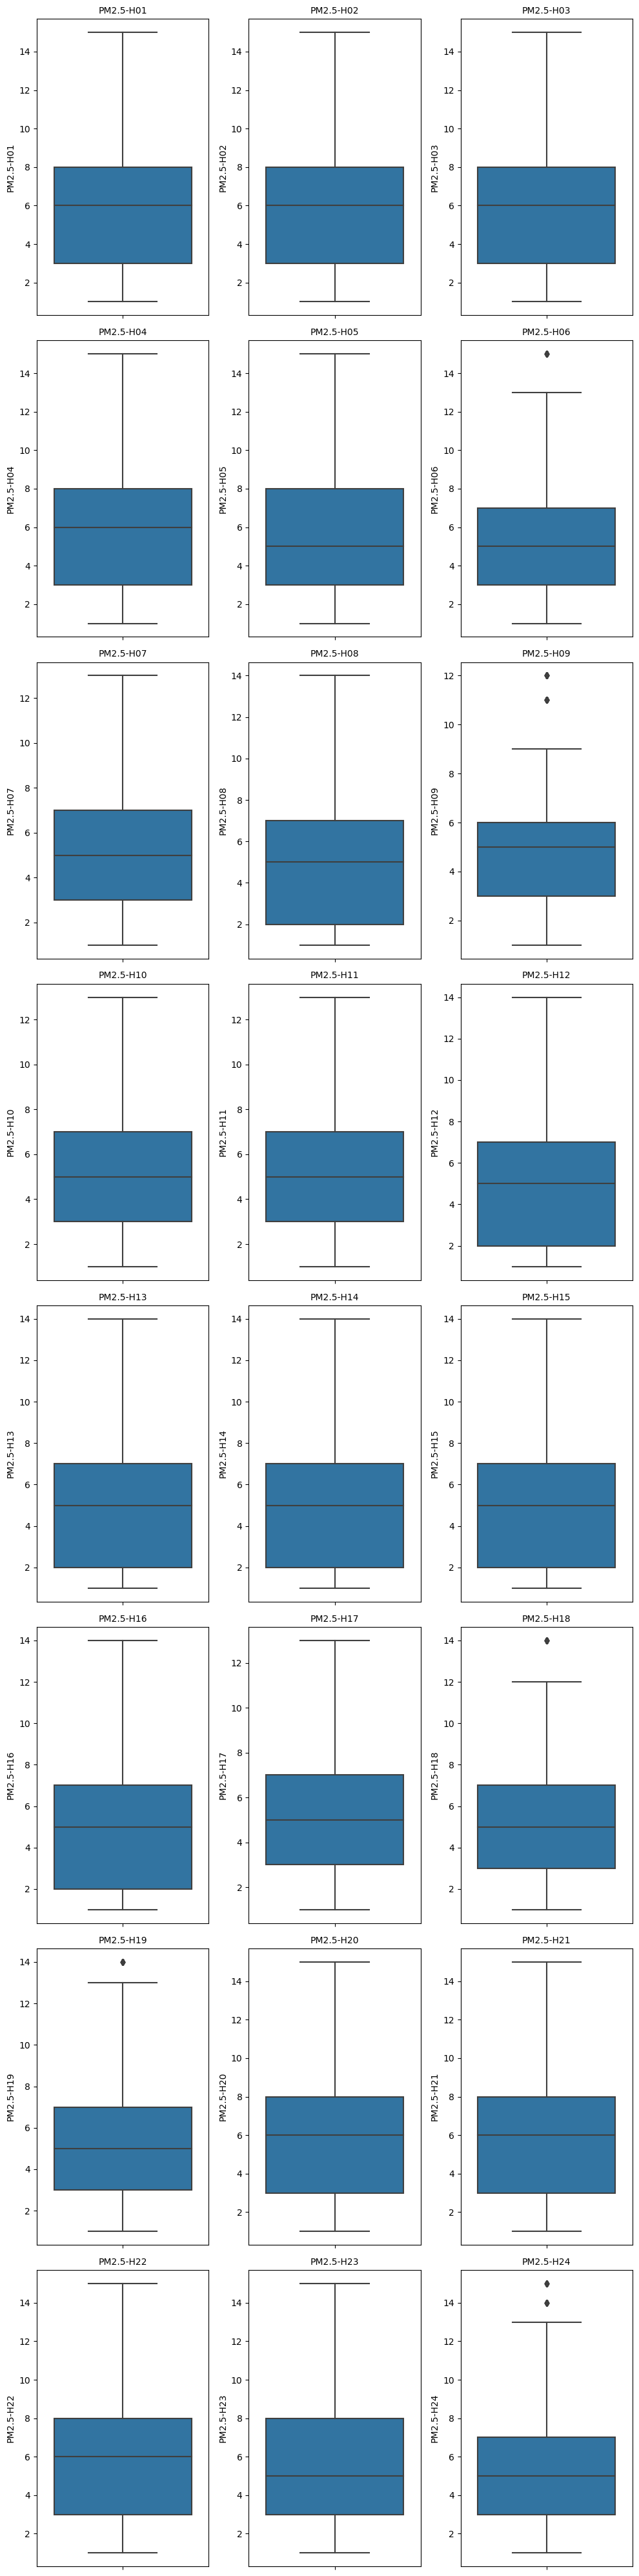

In [44]:
# Columns listed to create box plots.
columns_p = ['PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Display Boxplots after fixing Outliers. 

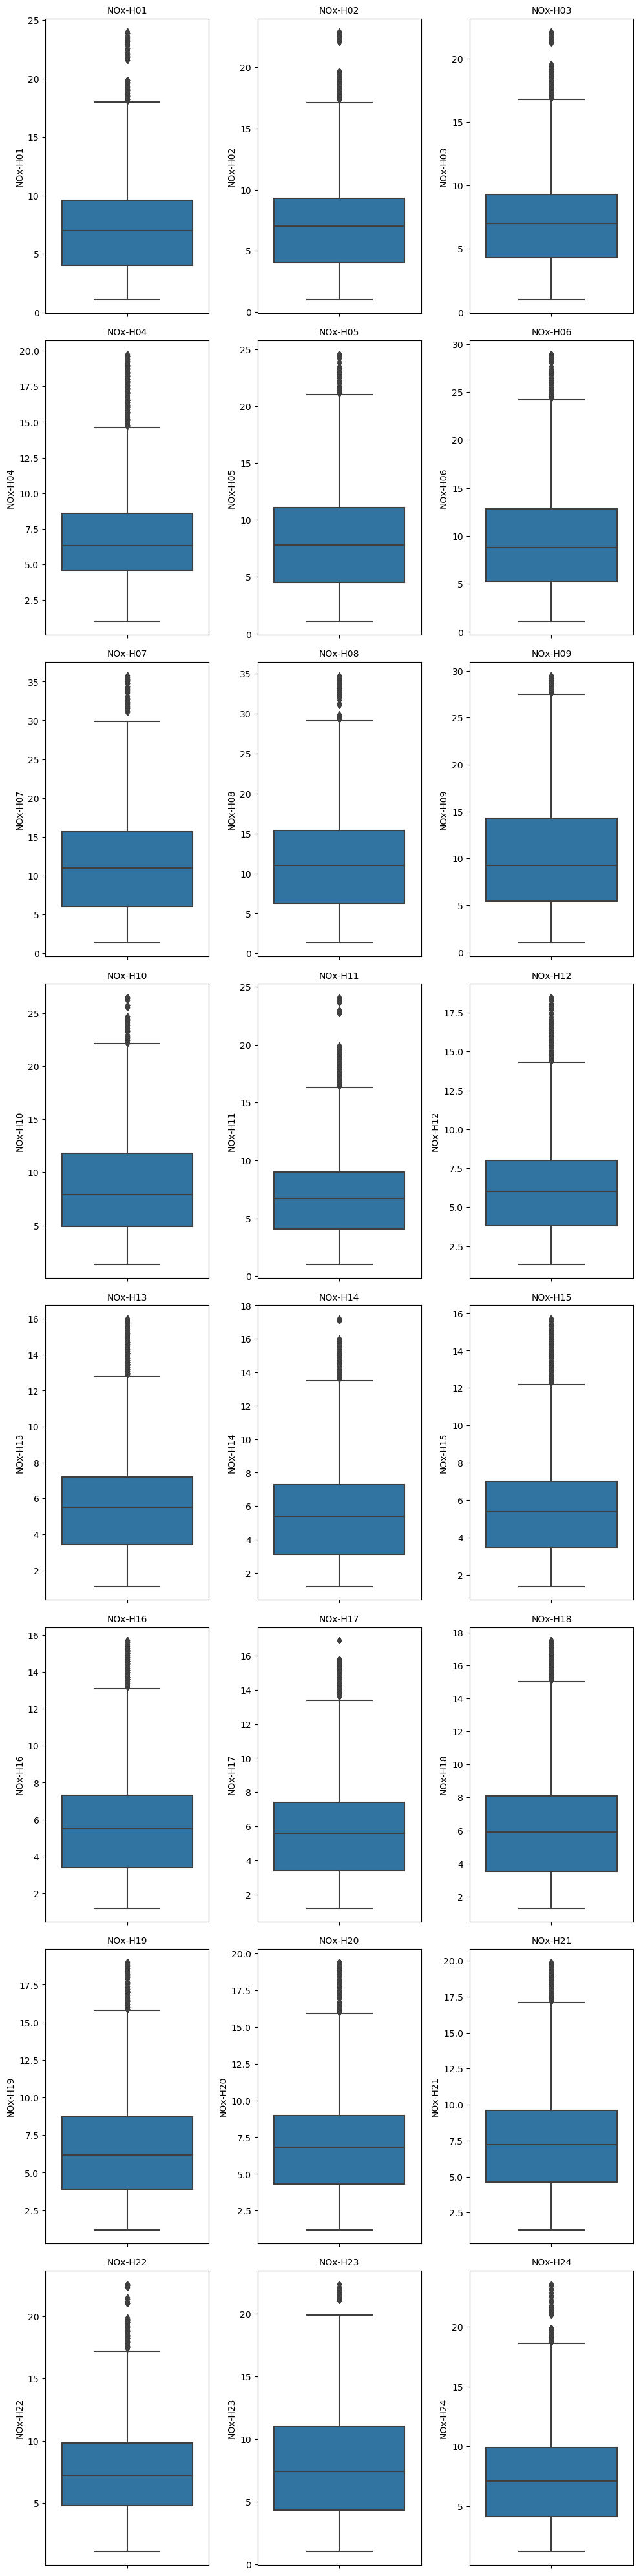

In [45]:
# Columns listed to create box plots.
columns_p = ['NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Z-score method to fix Outliers in Sulphur Dioxide Columns.

In [46]:
# List of columns that need to have outliers fixed.
columns_f = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24']


#Use the Z-score approach to repair outliers as you loop through the designated columns.
for column in columns_f:
    # Determine the Z-scores for every column data point.
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

   # Determining the upper and lower Z-score cutoff limits.
    u_threshold = 0.11  # Upper threshold
    l_threshold = 0.75  # lower threshold

    # Values over the upper threshold should be replaced with the upper threshold value.
    df[column] = np.where(z_scores > u_threshold, u_threshold, df[column])

    # Substitute the lower threshold value for values that fall below it.
    df[column] = np.where(z_scores < l_threshold, l_threshold, df[column])

# Save the DataFrame after adjusting the outliers.
# Change 'cleaned_dataset.csv' to the output filename that you want.
df.to_csv('cleaned_dataset.csv', index=False)


### Display Boxplots after fixing Outliers. 

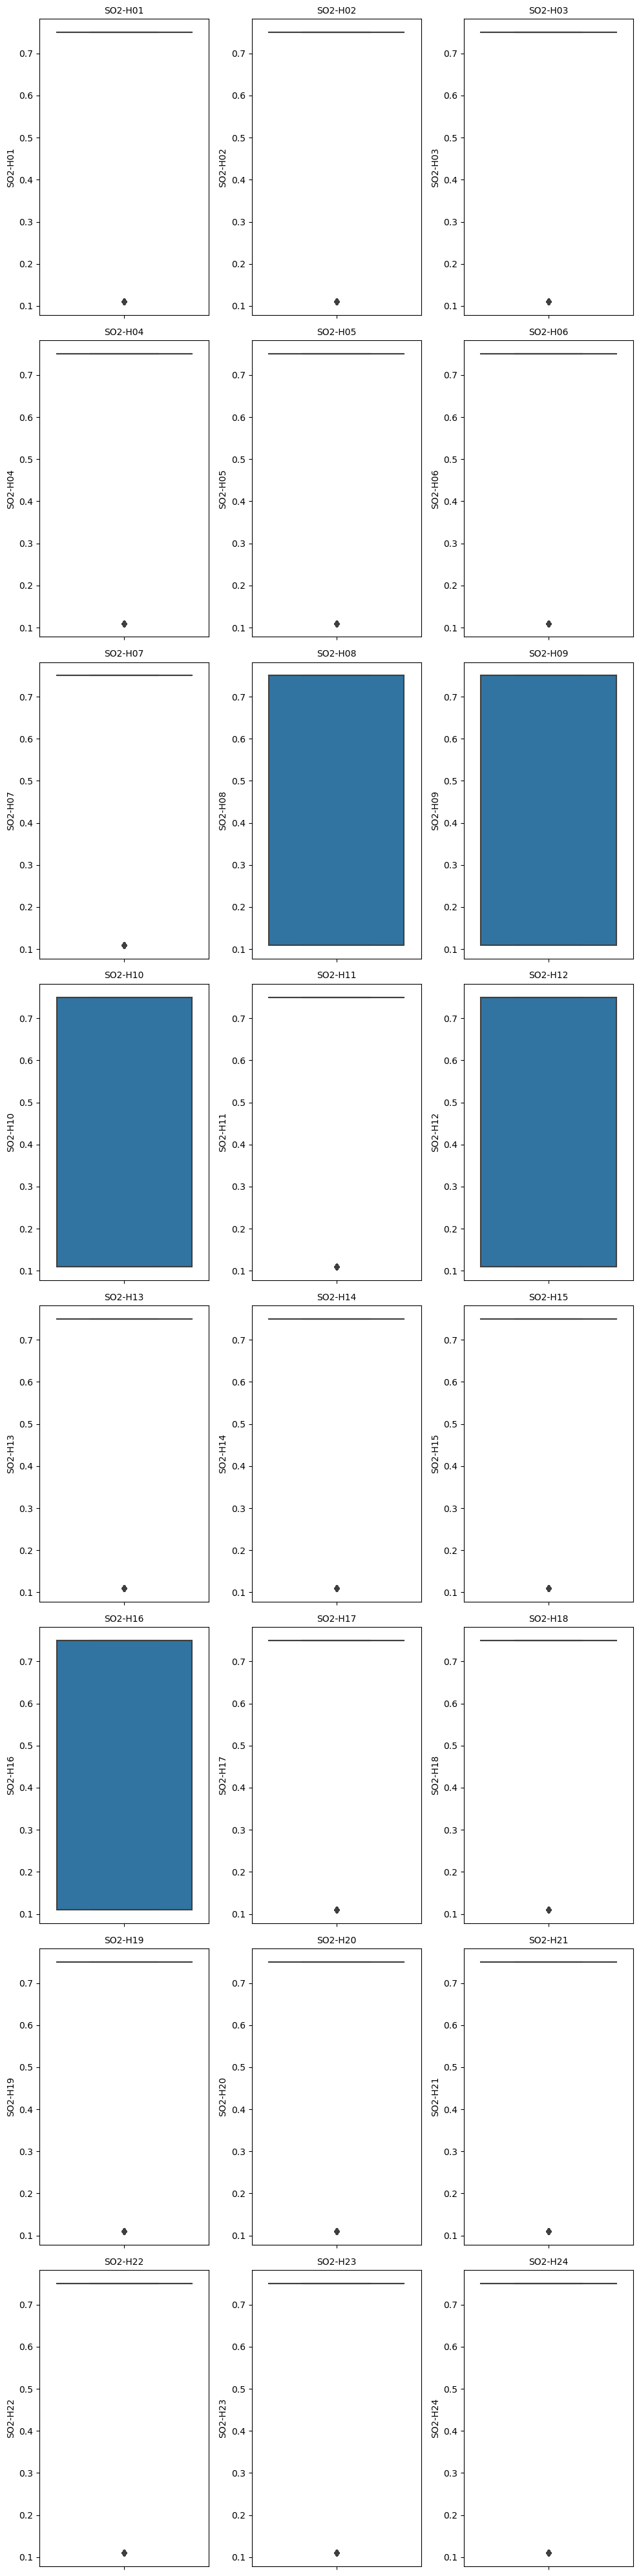

In [47]:
# Columns listed to create box plots.
columns_p = ['SO2-H01', 'SO2-H02', 'SO2-H03', 'SO2-H04', 'SO2-H05', 'SO2-H06', 'SO2-H07', 'SO2-H08', 'SO2-H09', 'SO2-H10', 'SO2-H11', 'SO2-H12', 'SO2-H13', 'SO2-H14', 'SO2-H15', 'SO2-H16', 'SO2-H17', 'SO2-H18', 'SO2-H19', 'SO2-H20', 'SO2-H21', 'SO2-H22', 'SO2-H23', 'SO2-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()


### Z-score method to fix Outliers in Carbon Monoxide Columns.

In [49]:
# List of columns that need to have outliers fixed.
columns_f = ['CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24']
#Use the Z-score approach to repair outliers as you loop through the designated columns.
for column in columns_f:
    # Determine the Z-scores for every column data point.
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

   # Determining the upper and lower Z-score cutoff limits.
    u_threshold = 0.11  # Upper threshold
    l_threshold = 0.75  # lower threshold

    # Values over the upper threshold should be replaced with the upper threshold value.
    df[column] = np.where(z_scores > u_threshold, u_threshold, df[column])

    # Substitute the lower threshold value for values that fall below it.
    df[column] = np.where(z_scores < l_threshold, l_threshold, df[column])

# Save the DataFrame after adjusting the outliers.
# Change 'cleaned_dataset.csv' to the output filename that you want.
df.to_csv('cleaned_dataset.csv', index=False)

### Display Boxplots after fixing Outliers. 

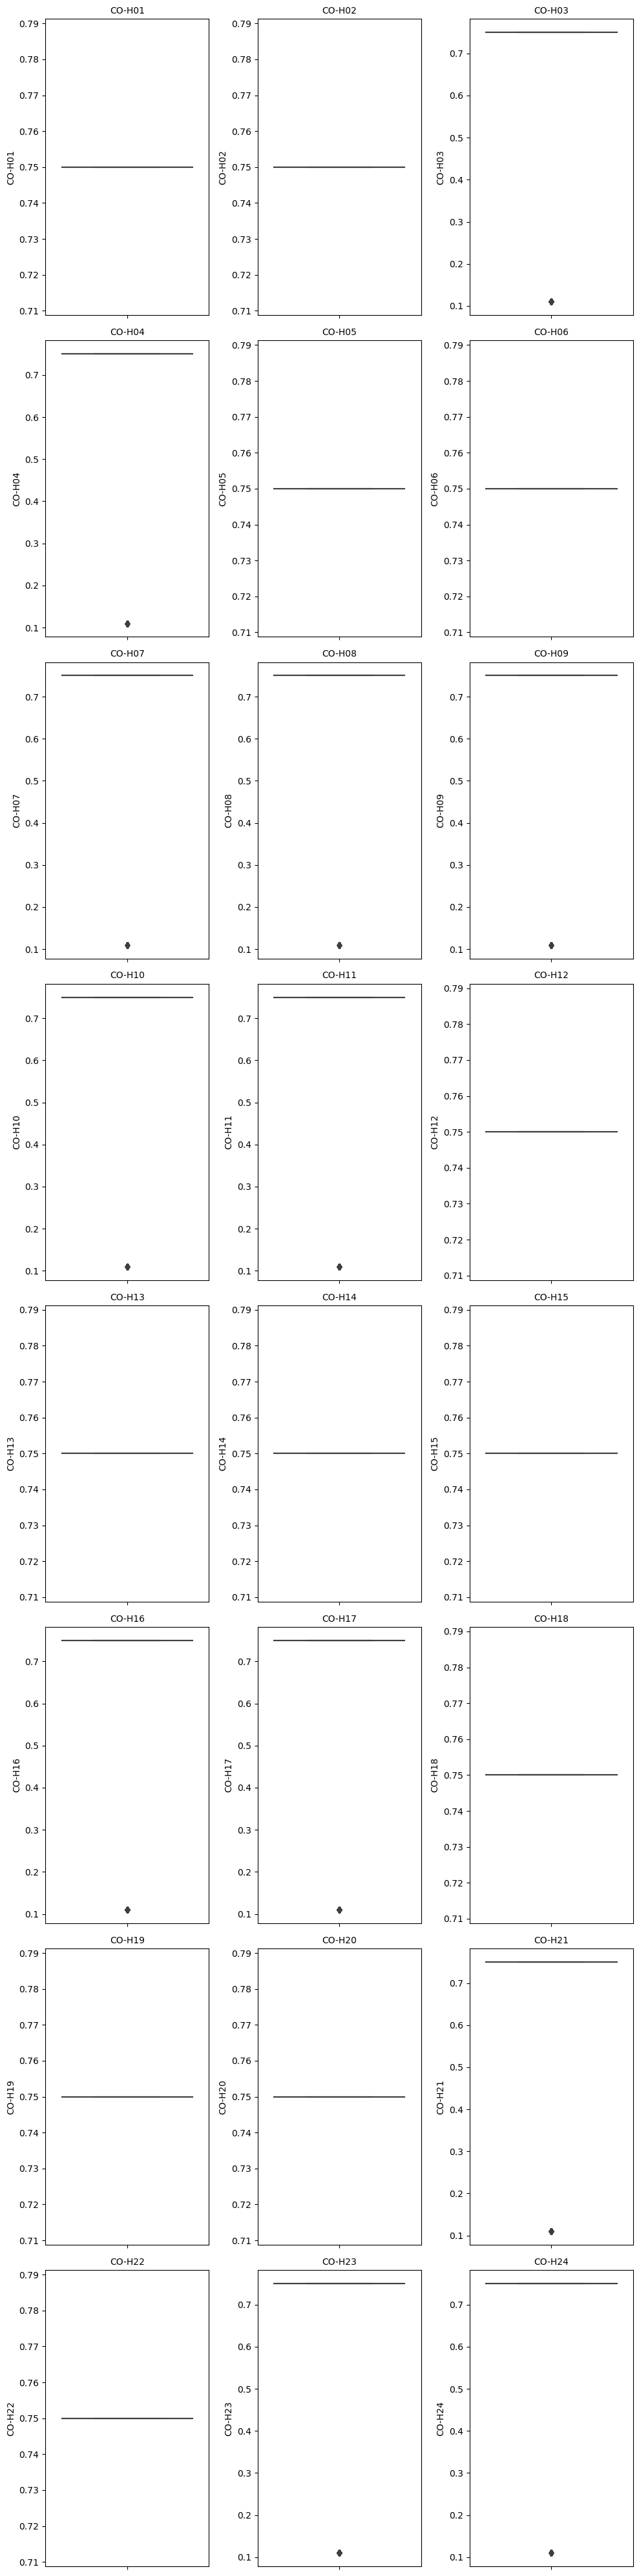

In [50]:
# Columns listed to create box plots.
columns_p = ['CO-H01', 'CO-H02', 'CO-H03', 'CO-H04', 'CO-H05', 'CO-H06', 'CO-H07', 'CO-H08', 'CO-H09', 'CO-H10', 'CO-H11', 'CO-H12', 'CO-H13', 'CO-H14', 'CO-H15', 'CO-H16', 'CO-H17', 'CO-H18', 'CO-H19', 'CO-H20', 'CO-H21', 'CO-H22', 'CO-H23', 'CO-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Z-score method to fix Outliers in Nitric oxide Columns.

In [51]:
# List of columns that need to have outliers fixed.
columns_f = ['NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24']

# Use the Z-score approach to repair outliers as you loop through the designated columns.
for column in columns_f:
    # Determine the Z-scores for every column data point.
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

   # Determining the upper and lower Z-score cutoff limits.
    u_threshold = 0.11  # Upper threshold
    l_threshold = 0.75  # lower threshold

    # Values over the upper threshold should be replaced with the upper threshold value.
    df[column] = np.where(z_scores > u_threshold, u_threshold, df[column])

    # Substitute the lower threshold value for values that fall below it.
    df[column] = np.where(z_scores < l_threshold, l_threshold, df[column])

# Save the DataFrame after adjusting the outliers.
# Change 'cleaned_dataset.csv' to the output filename that you want.
df.to_csv('cleaned_dataset.csv', index=False)

### Display Boxplots after fixing Outliers. 

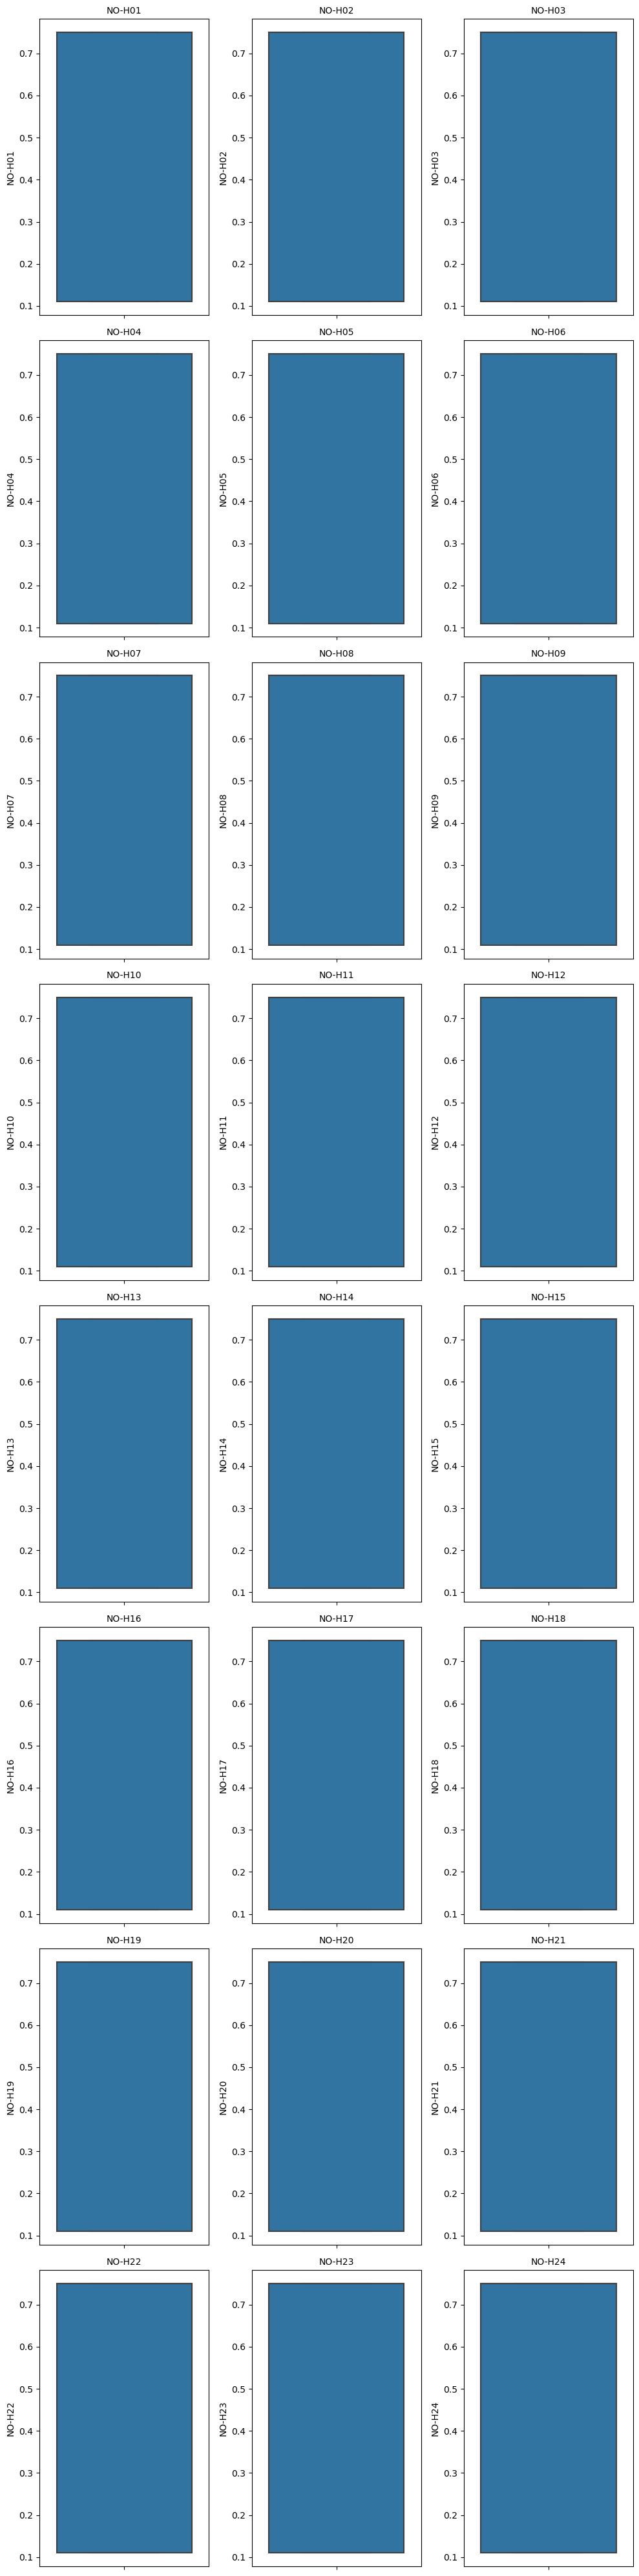

In [52]:
# Columns listed to create box plots.
columns_p = ['NO-H01', 'NO-H02', 'NO-H03', 'NO-H04', 'NO-H05', 'NO-H06', 'NO-H07', 'NO-H08', 'NO-H09', 'NO-H10', 'NO-H11', 'NO-H12', 'NO-H13', 'NO-H14', 'NO-H15', 'NO-H16', 'NO-H17', 'NO-H18', 'NO-H19', 'NO-H20', 'NO-H21', 'NO-H22', 'NO-H23', 'NO-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Z-score method to fix Outliers in Nitrogen Dioxide Columns.

In [53]:
# List of columns that need to have outliers fixed.
columns_f = ['NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24']

# Use the Z-score approach to repair outliers as you loop through the designated columns.
for column in columns_f:
    # Determine the Z-scores for every column data point.
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

   # Determining the upper and lower Z-score cutoff limits.
    u_threshold = 0.11  # Upper threshold
    l_threshold = 0.75  # lower threshold

    # Values over the upper threshold should be replaced with the upper threshold value.
    df[column] = np.where(z_scores > u_threshold, u_threshold, df[column])

    # Substitute the lower threshold value for values that fall below it.
    df[column] = np.where(z_scores < l_threshold, l_threshold, df[column])

# Save the DataFrame after adjusting the outliers.
# Change 'cleaned_dataset.csv' to the output filename that you want.
df.to_csv('cleaned_dataset.csv', index=False)

### Display Boxplots after fixing Outliers. 

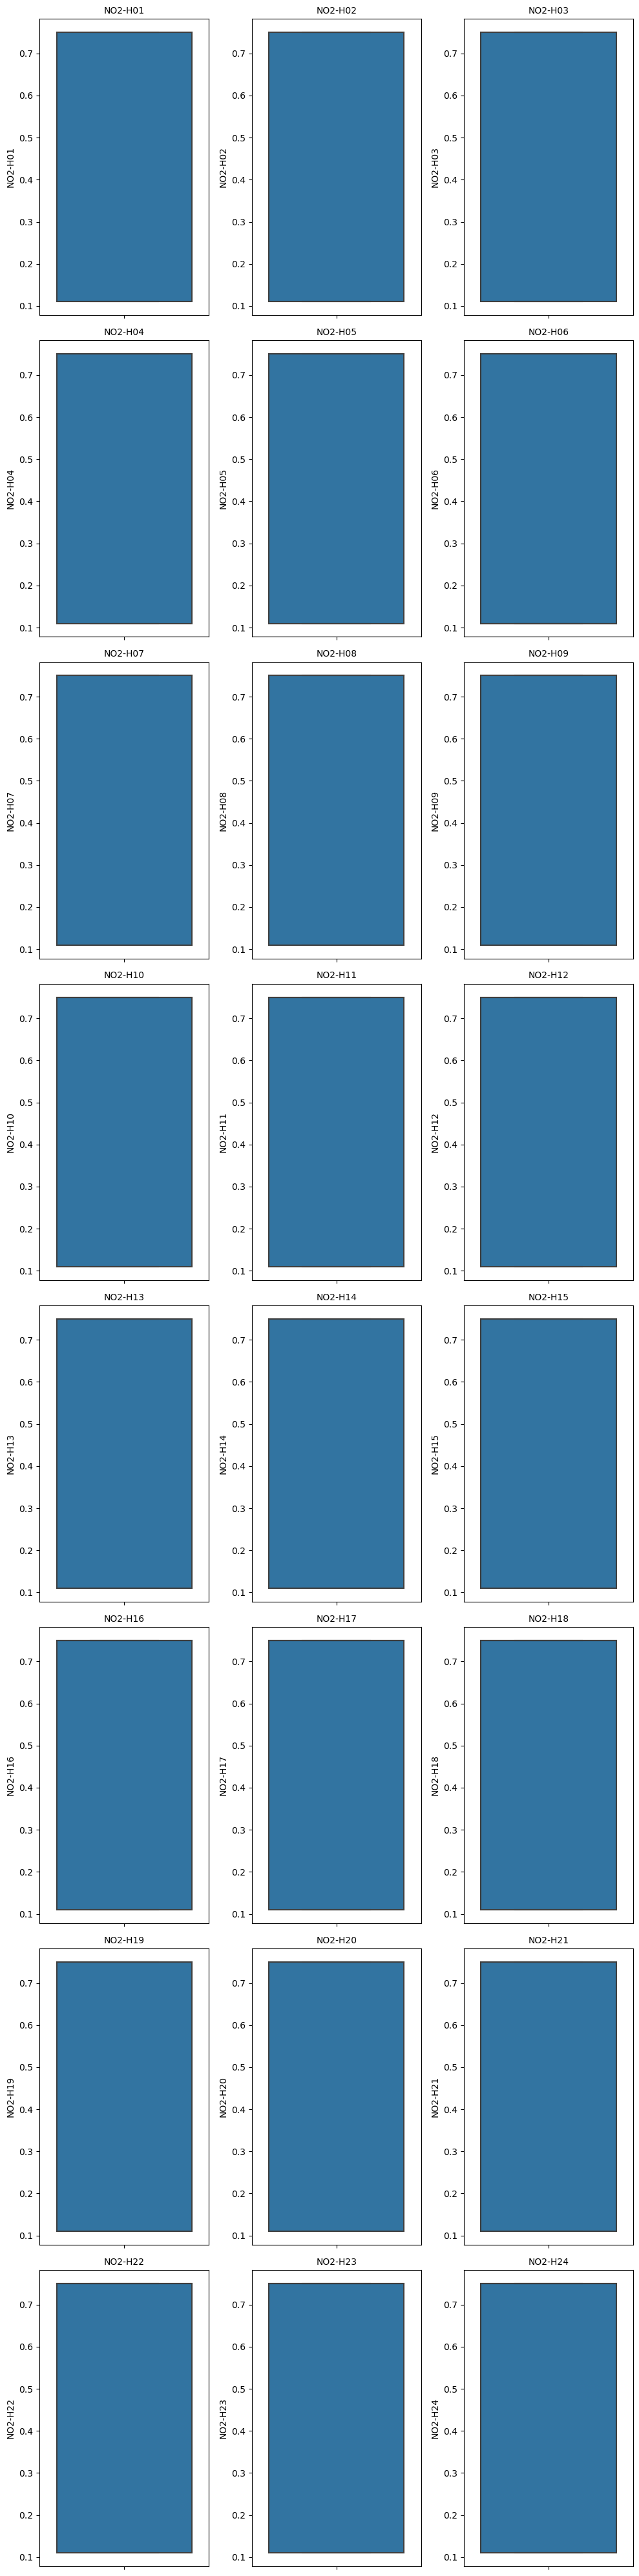

In [54]:
# Columns listed to create box plots.
columns_p = ['NO2-H01', 'NO2-H02', 'NO2-H03', 'NO2-H04', 'NO2-H05', 'NO2-H06', 'NO2-H07', 'NO2-H08', 'NO2-H09', 'NO2-H10', 'NO2-H11', 'NO2-H12', 'NO2-H13', 'NO2-H14', 'NO2-H15', 'NO2-H16', 'NO2-H17', 'NO2-H18', 'NO2-H19', 'NO2-H20', 'NO2-H21', 'NO2-H22', 'NO2-H23', 'NO2-H24']

# Create subplots for box plots.
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  # find out the number of rows needed

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Z-score method to fix Outliers in Ground Ozone level Columns. 

In [55]:
# List of columns that need to have outliers fixed.
columns_f = ['O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24']

# Use the Z-score approach to repair outliers as you loop through the designated columns.
for column in columns_f:
    # Determine the Z-scores for every column data point.
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

   # Determining the upper and lower Z-score cutoff limits.
    u_threshold = 0.11  # Upper threshold
    l_threshold = 0.75  # lower threshold

    # Values over the upper threshold should be replaced with the upper threshold value.
    df[column] = np.where(z_scores > u_threshold, u_threshold, df[column])

    # Substitute the lower threshold value for values that fall below it.
    df[column] = np.where(z_scores < l_threshold, l_threshold, df[column])

# Save the DataFrame after adjusting the outliers.
# Change 'cleaned_dataset.csv' to the output filename that you want.
df.to_csv('cleaned_dataset.csv', index=False)

### Display Boxplots after fixing Outliers. 

In [ ]:
# Columns listed to create box plots.
columns_p = ['O3-H01', 'O3-H02', 'O3-H03', 'O3-H04', 'O3-H05', 'O3-H06', 'O3-H07', 'O3-H08', 'O3-H09', 'O3-H10', 'O3-H11', 'O3-H12', 'O3-H13', 'O3-H14', 'O3-H15', 'O3-H16', 'O3-H17', 'O3-H18', 'O3-H19', 'O3-H20', 'O3-H21', 'O3-H22', 'O3-H23', 'O3-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Z-score method to fix Outliers in Particulate Matter (PM2.5) Columns. 

In [56]:
# List of columns that need to have outliers fixed.
columns_f = ['PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24']

# Use the Z-score approach to repair outliers as you loop through the designated columns.
for column in columns_f:
    # Determine the Z-scores for every column data point.
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

   # Determining the upper and lower Z-score cutoff limits.
    u_threshold = 0.11  # Upper threshold
    l_threshold = 0.75  # lower threshold

    # Values over the upper threshold should be replaced with the upper threshold value.
    df[column] = np.where(z_scores > u_threshold, u_threshold, df[column])

    # Substitute the lower threshold value for values that fall below it.
    df[column] = np.where(z_scores < l_threshold, l_threshold, df[column])

# Save the DataFrame after adjusting the outliers.
# Change 'cleaned_dataset.csv' to the output filename that you want.
df.to_csv('cleaned_dataset.csv', index=False)

### Display Boxplots after fixing Outliers. 

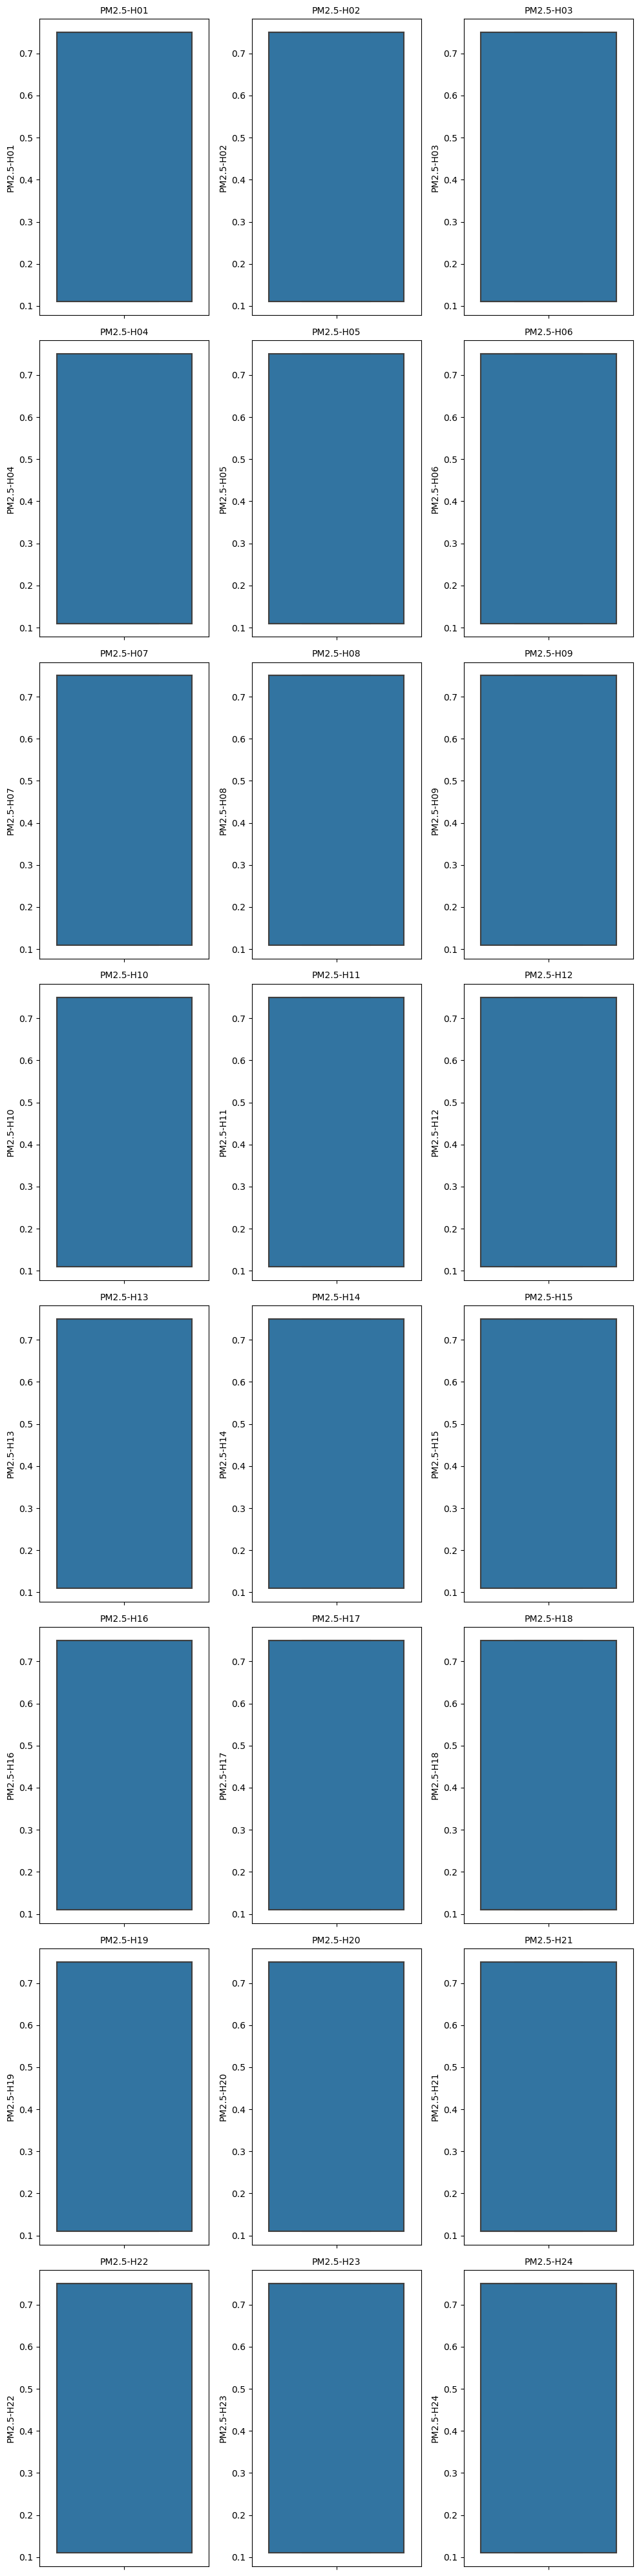

In [57]:
# Columns listed to create box plots.
columns_p = ['PM2.5-H01', 'PM2.5-H02', 'PM2.5-H03', 'PM2.5-H04', 'PM2.5-H05', 'PM2.5-H06', 'PM2.5-H07', 'PM2.5-H08', 'PM2.5-H09', 'PM2.5-H10', 'PM2.5-H11', 'PM2.5-H12', 'PM2.5-H13', 'PM2.5-H14', 'PM2.5-H15', 'PM2.5-H16', 'PM2.5-H17', 'PM2.5-H18', 'PM2.5-H19', 'PM2.5-H20', 'PM2.5-H21', 'PM2.5-H22', 'PM2.5-H23', 'PM2.5-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()

### Z-score method to fix Outliers in Nitrogen Oxide Columns. 

In [58]:
# List of columns that need to have outliers fixed.
columns_f = ['NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Use the Z-score approach to repair outliers as you loop through the designated columns.
for column in columns_f:
    # Determine the Z-scores for every column data point.
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

   # Determining the upper and lower Z-score cutoff limits.
    u_threshold = 0.11  # Upper threshold
    l_threshold = 0.75  # lower threshold

    # Values over the upper threshold should be replaced with the upper threshold value.
    df[column] = np.where(z_scores > u_threshold, u_threshold, df[column])

    # Substitute the lower threshold value for values that fall below it.
    df[column] = np.where(z_scores < l_threshold, l_threshold, df[column])

# Save the DataFrame after adjusting the outliers.
# Change 'cleaned_dataset.csv' to the output filename that you want.
df.to_csv('cleaned_dataset.csv', index=False)

### Display Boxplots after fixing Outliers. 

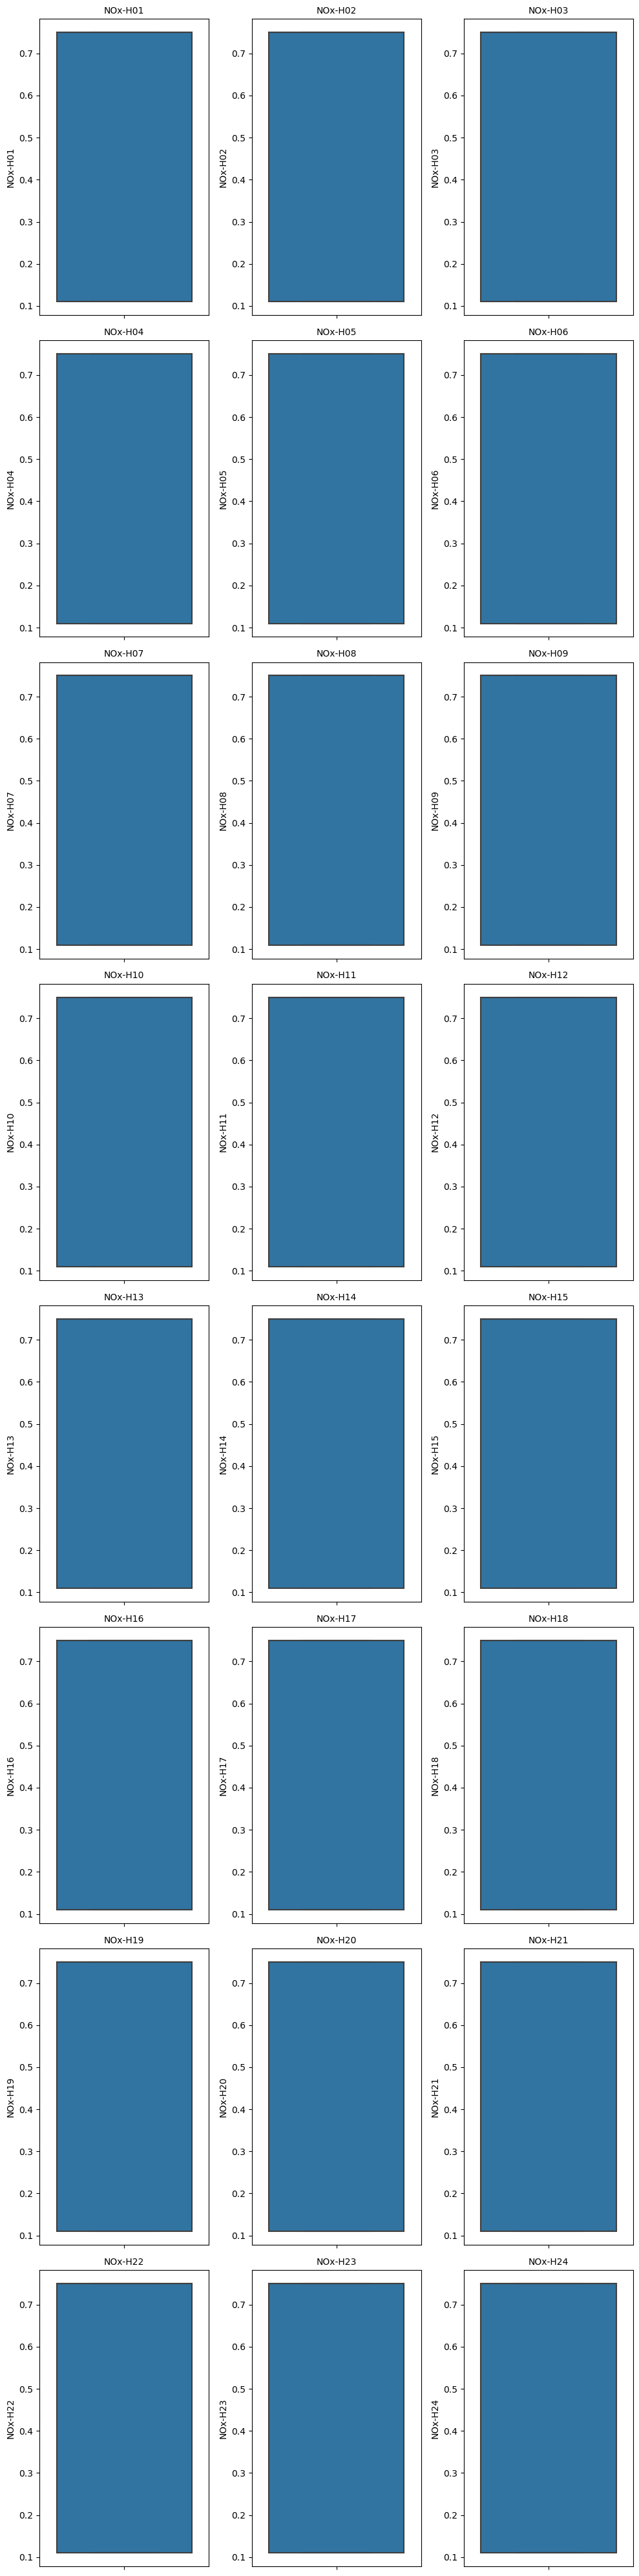

In [59]:
# Columns listed to create box plots.
columns_p = ['NOx-H01', 'NOx-H02', 'NOx-H03', 'NOx-H04', 'NOx-H05', 'NOx-H06', 'NOx-H07', 'NOx-H08', 'NOx-H09', 'NOx-H10', 'NOx-H11', 'NOx-H12', 'NOx-H13', 'NOx-H14', 'NOx-H15', 'NOx-H16', 'NOx-H17', 'NOx-H18', 'NOx-H19', 'NOx-H20', 'NOx-H21', 'NOx-H22', 'NOx-H23', 'NOx-H24']

# Create subplots for box plots
num_p = len(columns_p)
num_c = 3  # Number of columns in subplots.
num_r = -(-num_p // num_c)  #find out the number of rows needed.

plt.figure(figsize=(10, 5 * num_r))  # Values for the figure size.

for i, column in enumerate(columns_p, 1):
    plt.subplot(num_r, num_c, i)
    sns.boxplot(data=df, y=column)
    plt.title(column, fontsize=10)

plt.tight_layout()
plt.show()